In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

##Carregando a base de dados

In [2]:
#https://archive.ics.uci.edu/ml/datasets/HCV+data
#The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.
data = pd.read_csv("/content/hcvdat0.csv")

## Explorando a base

In [3]:
pd.options.display.max_columns = data.shape[1]
pd.options.display.float_format = '{:,.3f}'.format
print("Dataframe size: ", data.shape)
print(data.head())
print("Unique labels: ", data.Category.unique().tolist())

Dataframe size:  (615, 14)
   Unnamed: 0       Category  Age Sex    ALB    ALP    ALT    AST    BIL  \
0           1  0=Blood Donor   32   m 38.500 52.500  7.700 22.100  7.500   
1           2  0=Blood Donor   32   m 38.500 70.300 18.000 24.700  3.900   
2           3  0=Blood Donor   32   m 46.900 74.700 36.200 52.600  6.100   
3           4  0=Blood Donor   32   m 43.200 52.000 30.600 22.600 18.900   
4           5  0=Blood Donor   32   m 39.200 74.100 32.600 24.800  9.600   

     CHE  CHOL    CREA    GGT   PROT  
0  6.930 3.230 106.000 12.100 69.000  
1 11.170 4.800  74.000 15.600 76.500  
2  8.840 5.200  86.000 33.200 79.300  
3  7.330 4.740  80.000 33.800 75.700  
4  9.150 4.320  76.000 29.900 68.700  
Unique labels:  ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']


##Pré-processamento dos dados

###Redução dos dados - Removendo atributos pouco relevantes

In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['Sex'], axis=1, inplace=True)
data.drop(['Age'], axis=1, inplace=True)
print(data.head())

        Category    ALB    ALP    ALT    AST    BIL    CHE  CHOL    CREA  \
0  0=Blood Donor 38.500 52.500  7.700 22.100  7.500  6.930 3.230 106.000   
1  0=Blood Donor 38.500 70.300 18.000 24.700  3.900 11.170 4.800  74.000   
2  0=Blood Donor 46.900 74.700 36.200 52.600  6.100  8.840 5.200  86.000   
3  0=Blood Donor 43.200 52.000 30.600 22.600 18.900  7.330 4.740  80.000   
4  0=Blood Donor 39.200 74.100 32.600 24.800  9.600  9.150 4.320  76.000   

     GGT   PROT  
0 12.100 69.000  
1 15.600 76.500  
2 33.200 79.300  
3 33.800 75.700  
4 29.900 68.700  


###Transformação dos dados - Removendo da base de dados rótulos desnecessários

In [5]:
data.loc[data.Category == '0=Blood Donor', 'Category'] = 'Donor'
data.loc[data.Category == '0s=suspect Blood Donor', 'Category'] = 'Donor'
data.loc[data.Category == '1=Hepatitis', 'Category'] = 'Pathological'
data.loc[data.Category == '2=Fibrosis', 'Category'] = 'Pathological'
data.loc[data.Category == '3=Cirrhosis', 'Category'] = 'Pathological'

print(data.head())

  Category    ALB    ALP    ALT    AST    BIL    CHE  CHOL    CREA    GGT  \
0    Donor 38.500 52.500  7.700 22.100  7.500  6.930 3.230 106.000 12.100   
1    Donor 38.500 70.300 18.000 24.700  3.900 11.170 4.800  74.000 15.600   
2    Donor 46.900 74.700 36.200 52.600  6.100  8.840 5.200  86.000 33.200   
3    Donor 43.200 52.000 30.600 22.600 18.900  7.330 4.740  80.000 33.800   
4    Donor 39.200 74.100 32.600 24.800  9.600  9.150 4.320  76.000 29.900   

    PROT  
0 69.000  
1 76.500  
2 79.300  
3 75.700  
4 68.700  


###Limpeza dos dados - Removendo os vazios

In [6]:
print(data.isna().sum().to_frame('NA values'))
data.dropna(inplace=True)
print(data.isna().sum().to_frame('NA values'))

          NA values
Category          0
ALB               1
ALP              18
ALT               1
AST               0
BIL               0
CHE               0
CHOL             10
CREA              0
GGT               0
PROT              1
          NA values
Category          0
ALB               0
ALP               0
ALT               0
AST               0
BIL               0
CHE               0
CHOL              0
CREA              0
GGT               0
PROT              0


###Visualizando a base integrada

In [7]:
print(data.head())
print(data.describe())
print("Dataframe size pre-processed: ", data.shape)
print("Categories: ", data.Category.unique().tolist())

  Category    ALB    ALP    ALT    AST    BIL    CHE  CHOL    CREA    GGT  \
0    Donor 38.500 52.500  7.700 22.100  7.500  6.930 3.230 106.000 12.100   
1    Donor 38.500 70.300 18.000 24.700  3.900 11.170 4.800  74.000 15.600   
2    Donor 46.900 74.700 36.200 52.600  6.100  8.840 5.200  86.000 33.200   
3    Donor 43.200 52.000 30.600 22.600 18.900  7.330 4.740  80.000 33.800   
4    Donor 39.200 74.100 32.600 24.800  9.600  9.150 4.320  76.000 29.900   

    PROT  
0 69.000  
1 76.500  
2 79.300  
3 75.700  
4 68.700  
          ALB     ALP     ALT     AST     BIL     CHE    CHOL      CREA  \
count 589.000 589.000 589.000 589.000 589.000 589.000 589.000   589.000   
mean   41.624  68.123  26.575  33.773  11.018   8.204   5.391    81.669   
std     5.762  25.921  20.863  32.867  17.407   2.191   1.129    50.697   
min    14.900  11.300   0.900  10.600   0.800   1.420   1.430     8.000   
25%    38.800  52.500  16.400  21.500   5.200   6.930   4.620    68.000   
50%    41.900  66.200

##Exploração dos dados

###Visualizando a distribuição dos dados como pairplot do Seaborn

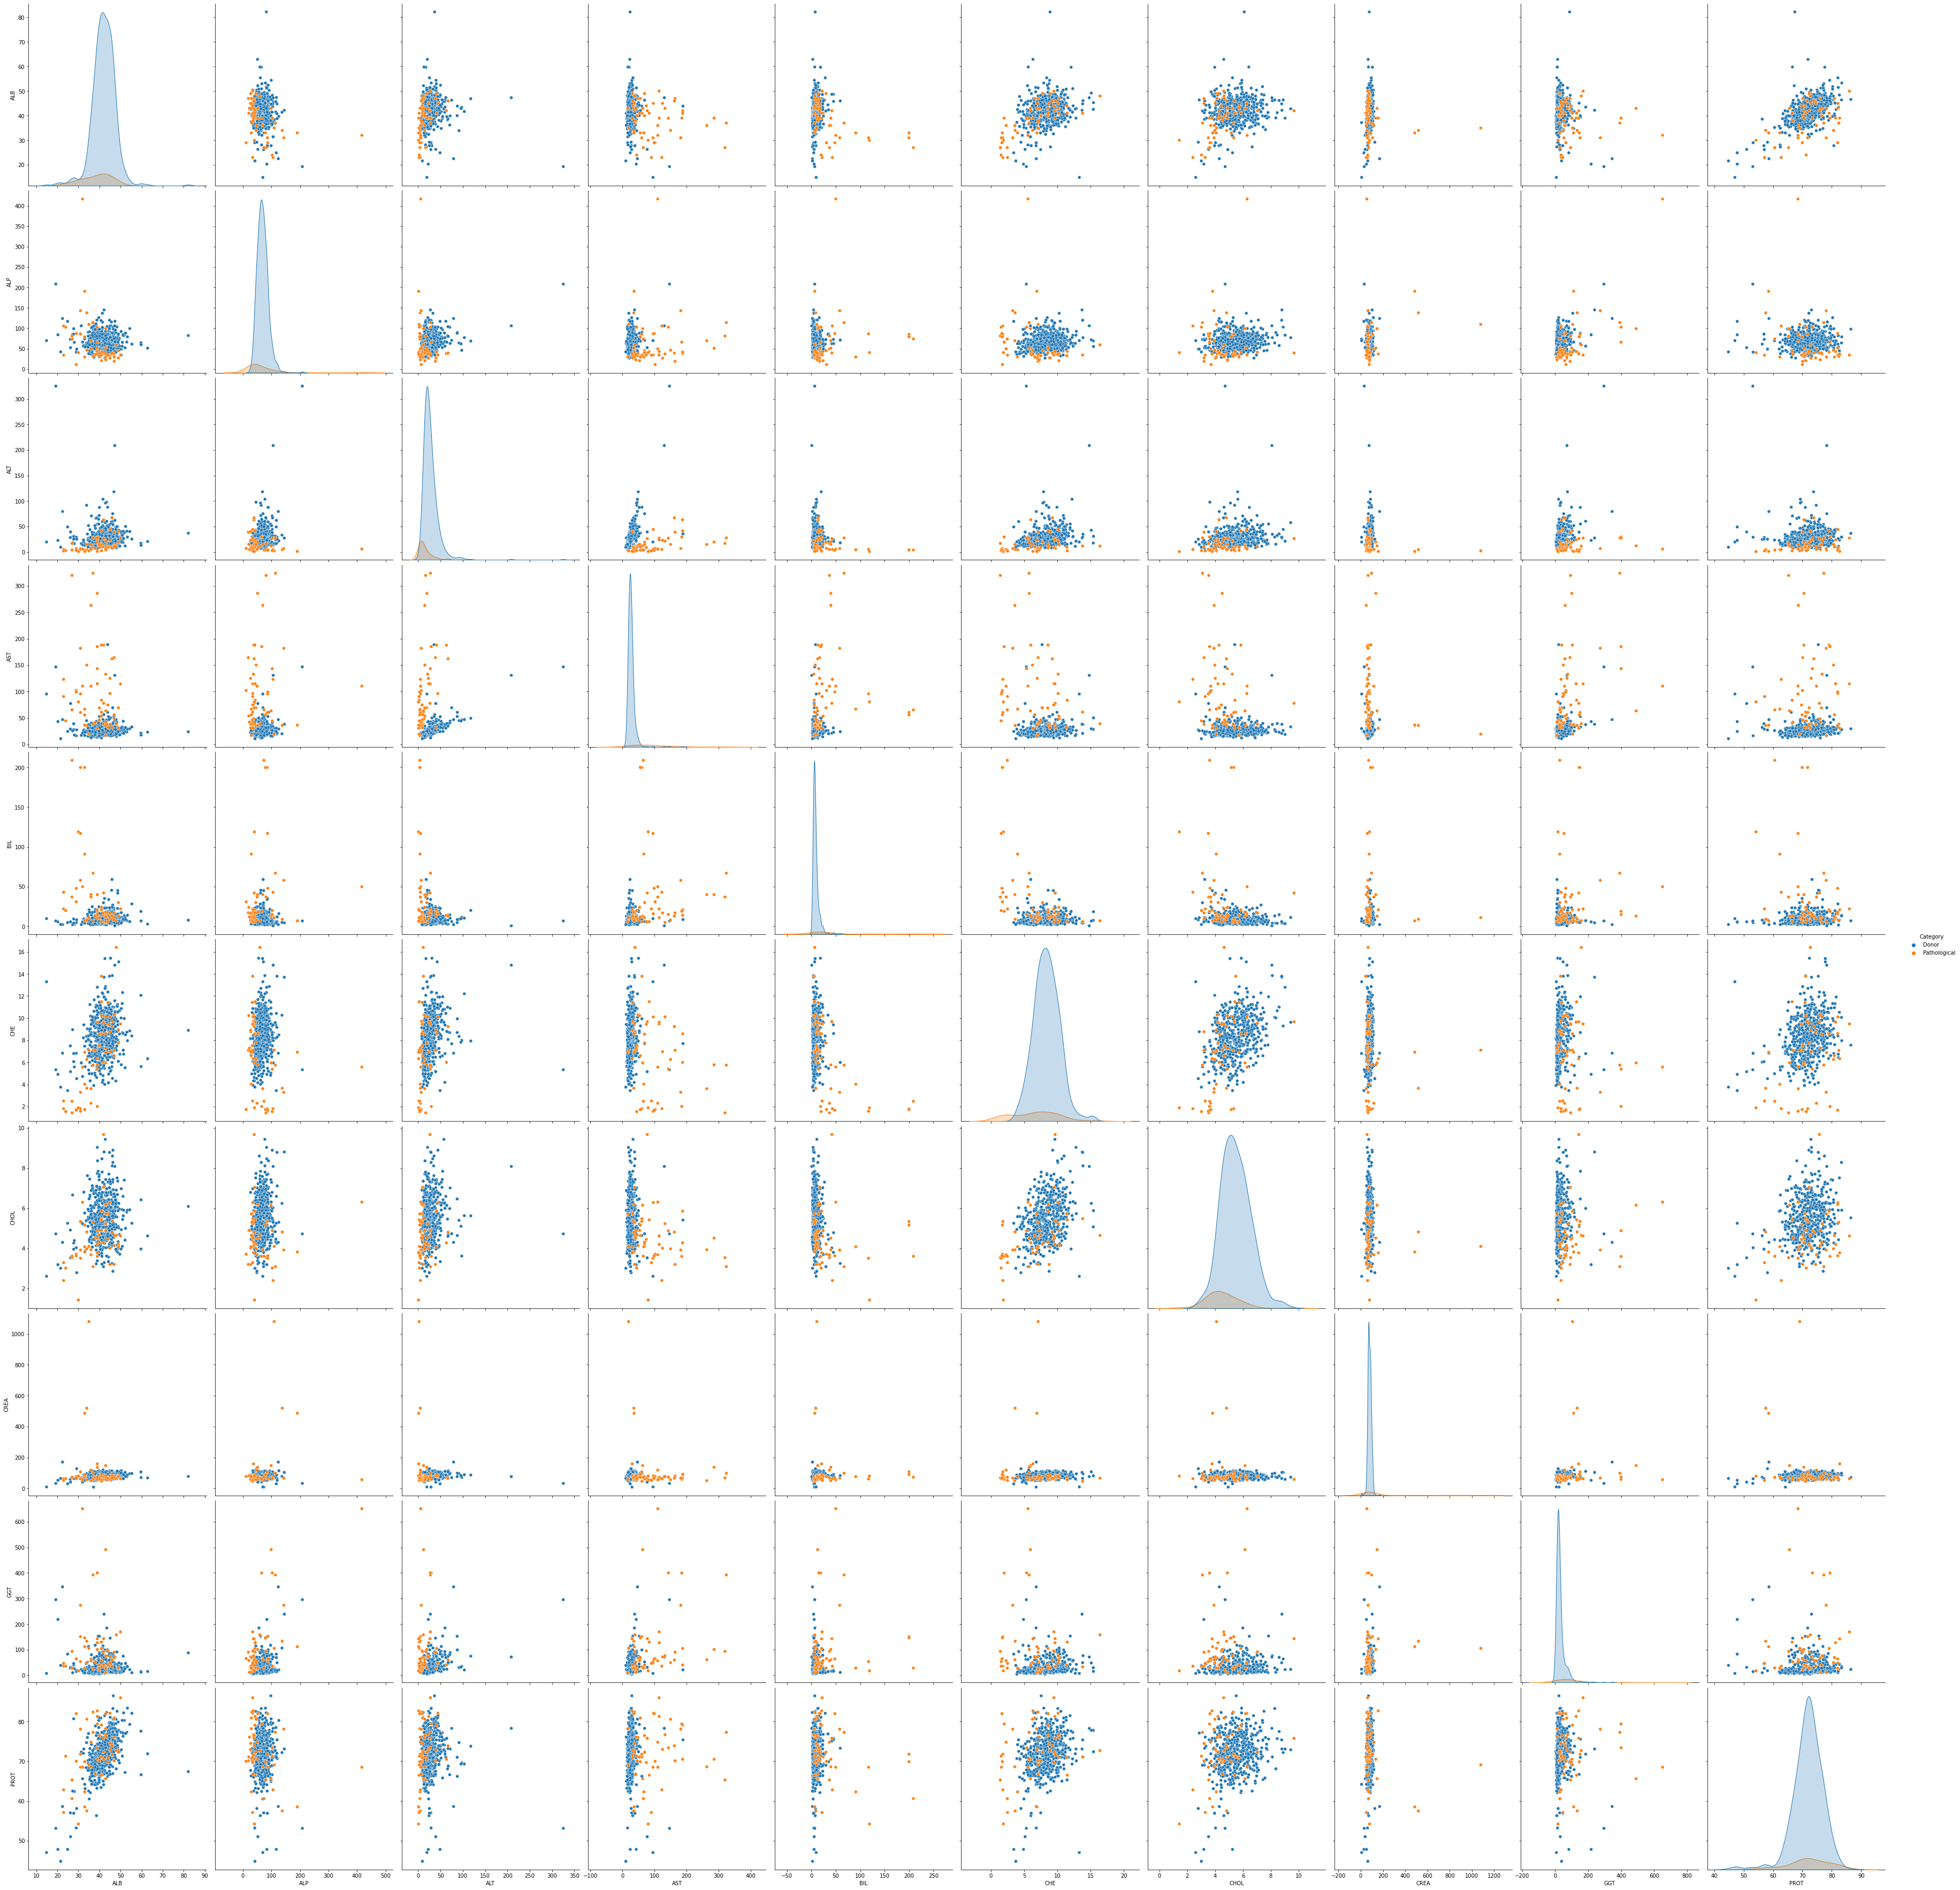

In [8]:
sn.pairplot(data=data, hue='Category', height=5)
plt.show()

###Visualizando a distribuição dos dados como pares com o jointplot

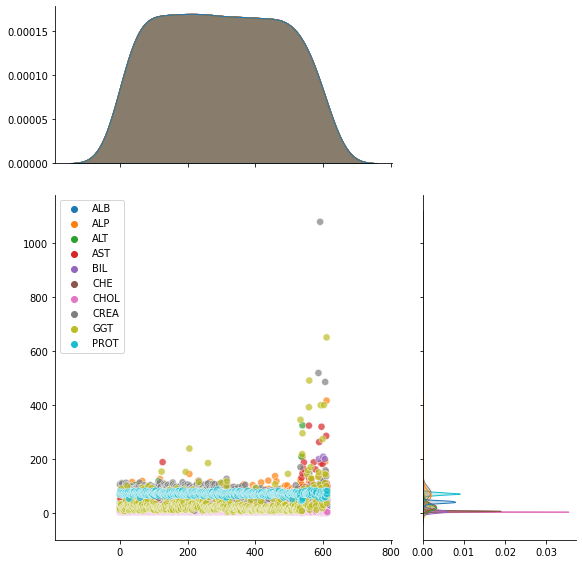

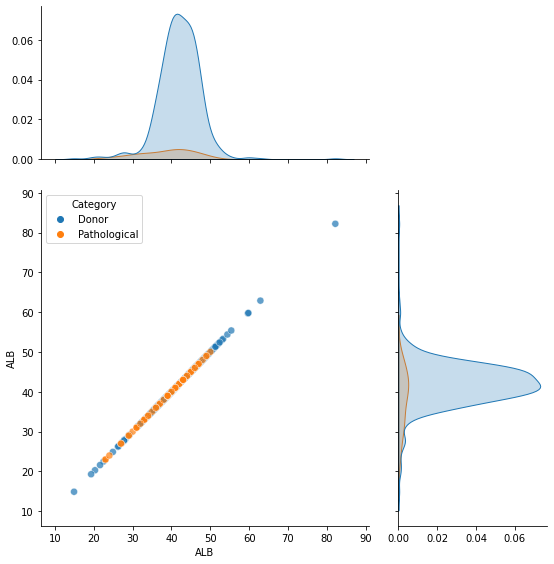

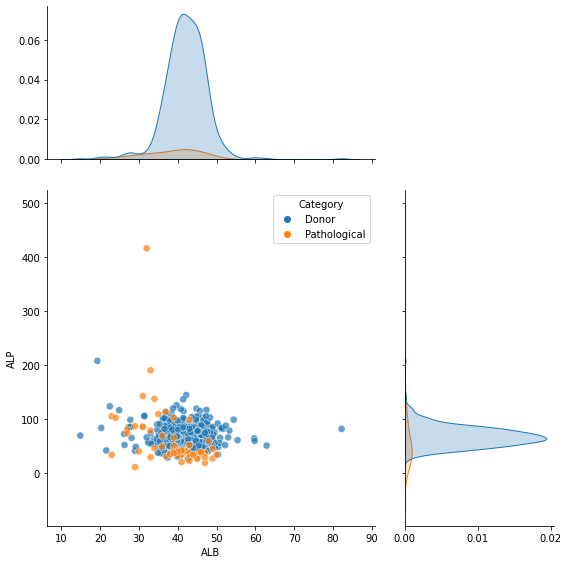

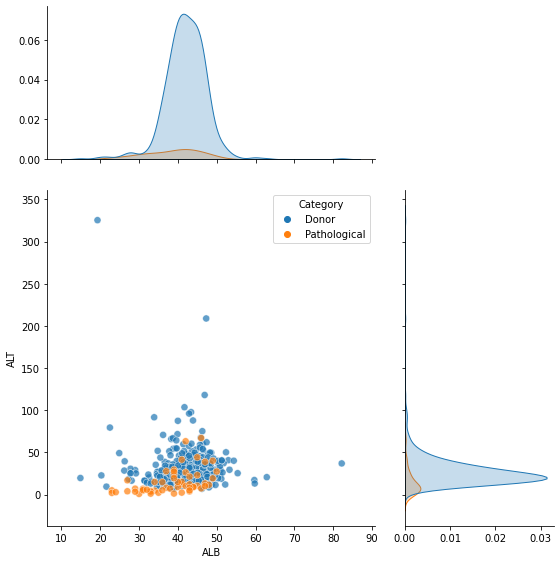

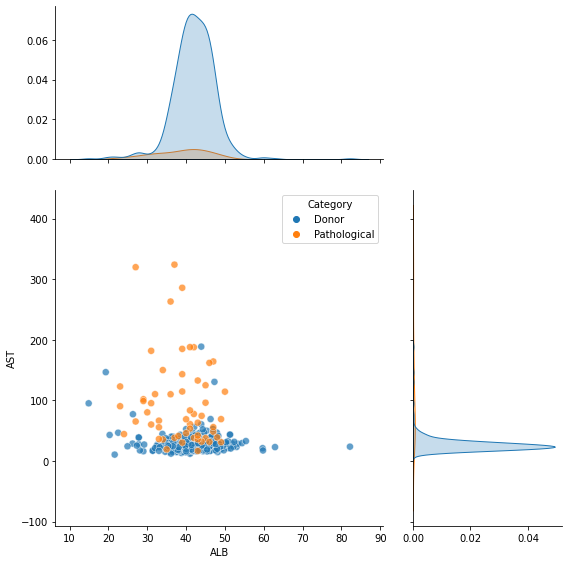

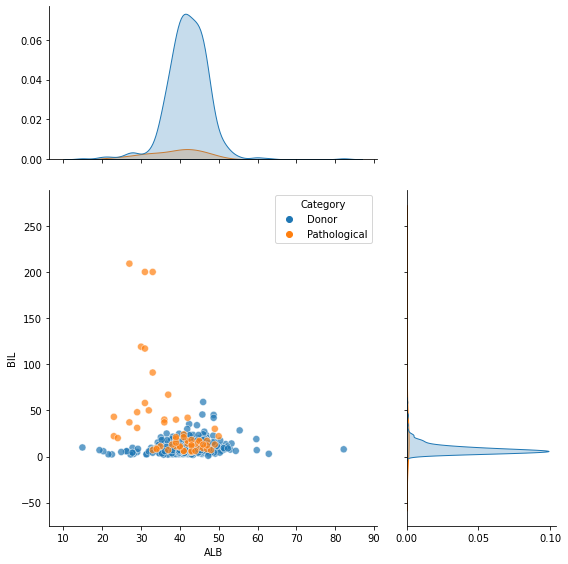

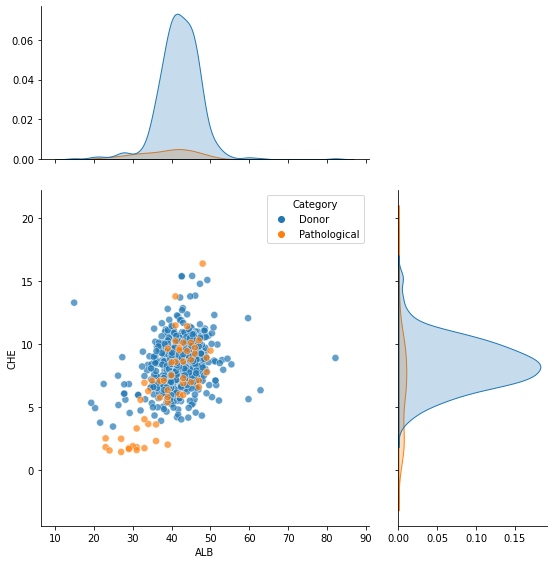

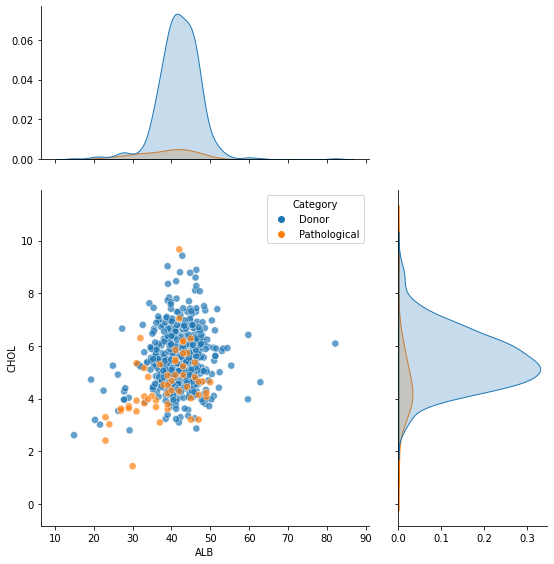

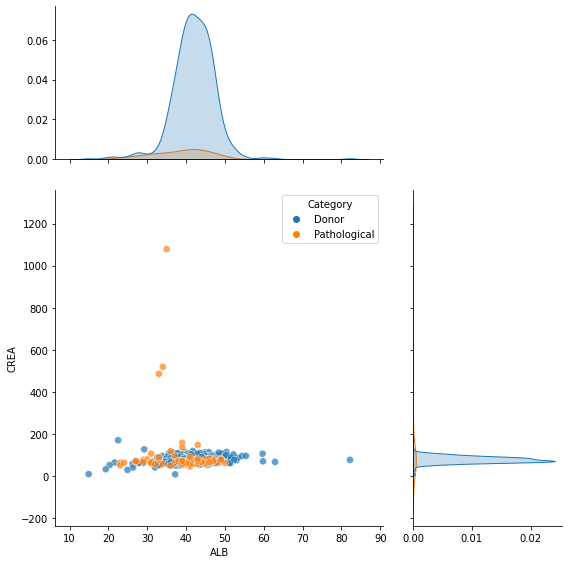

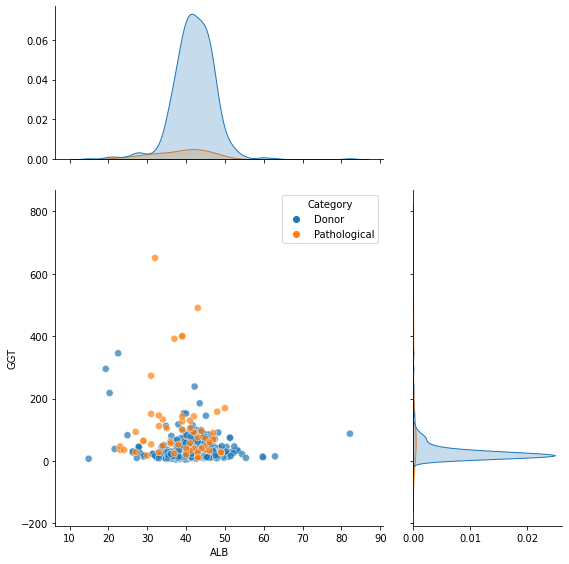

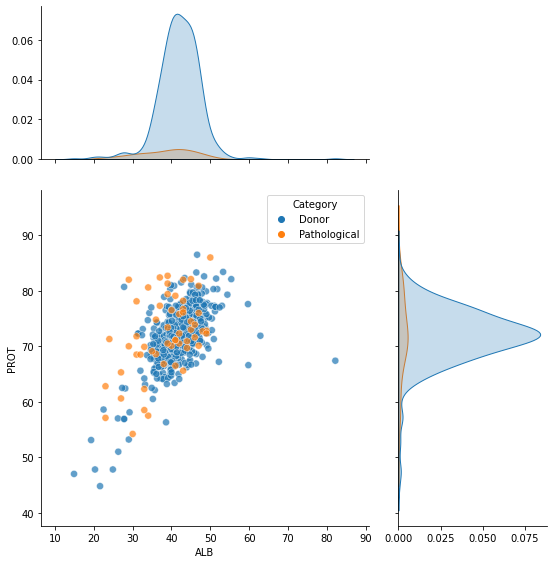

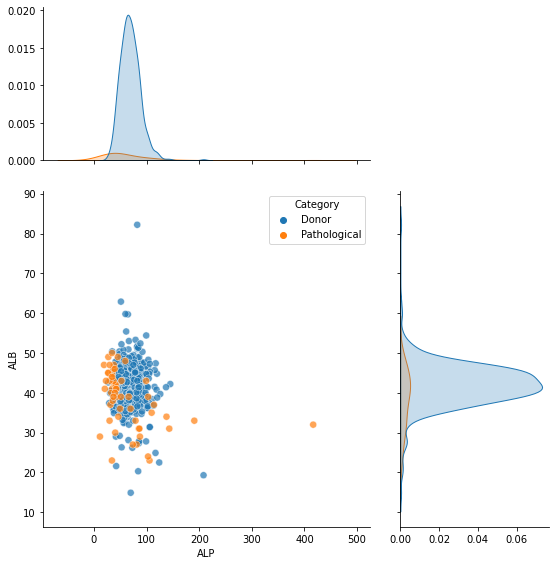

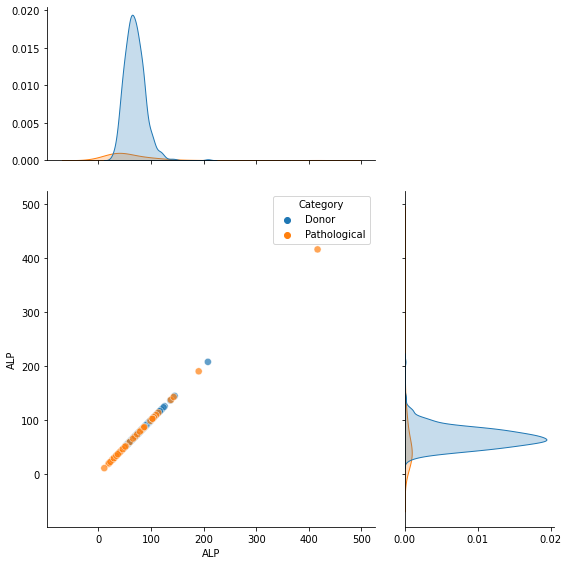

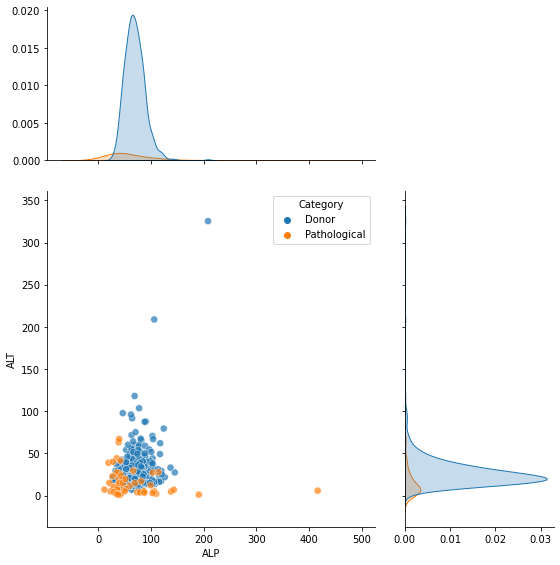

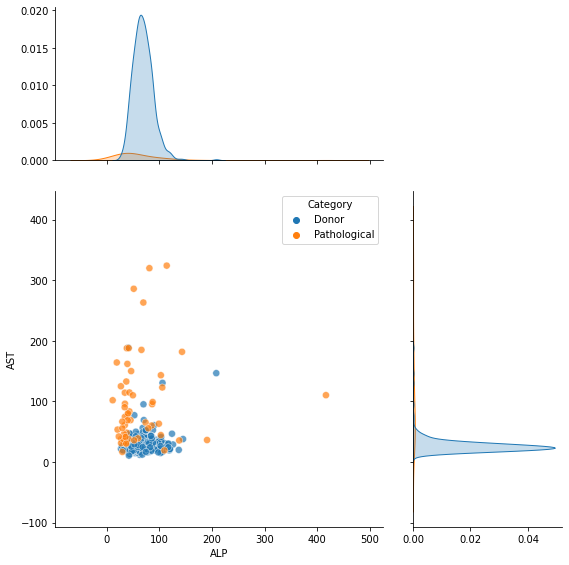

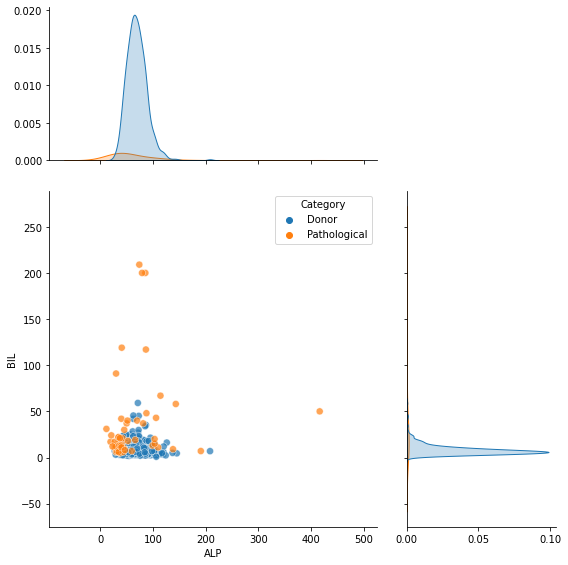

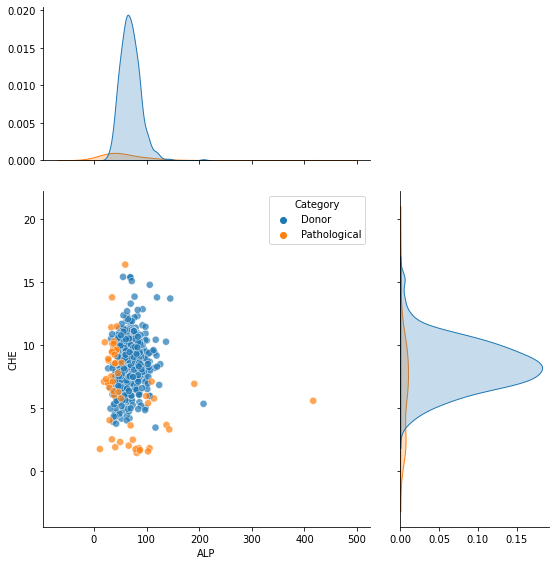

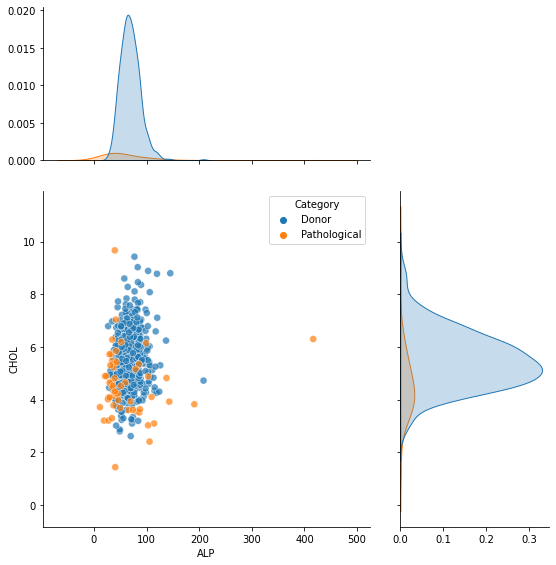

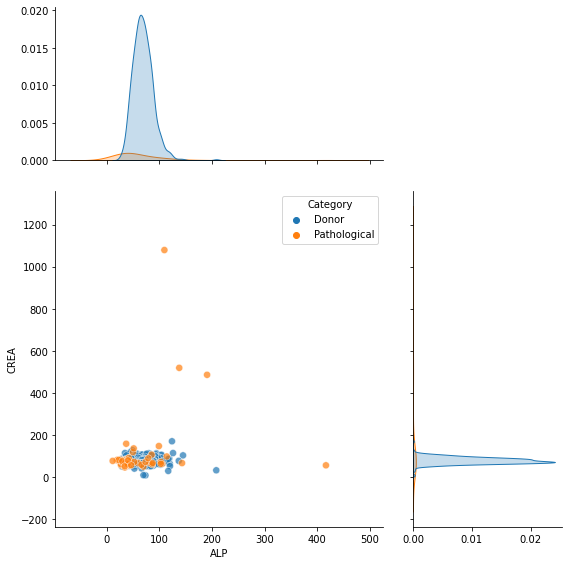

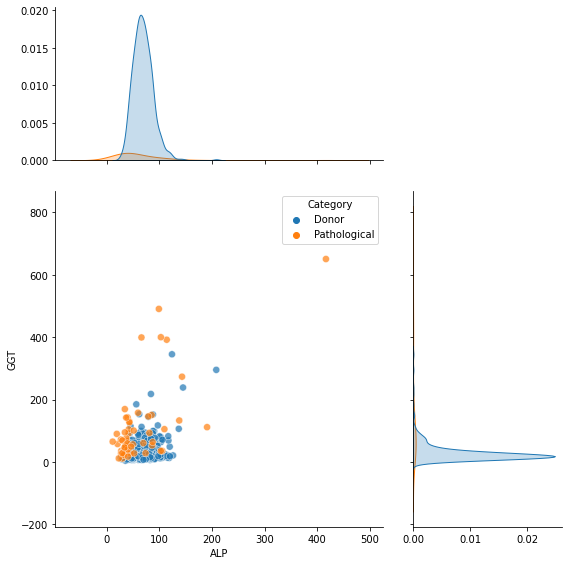

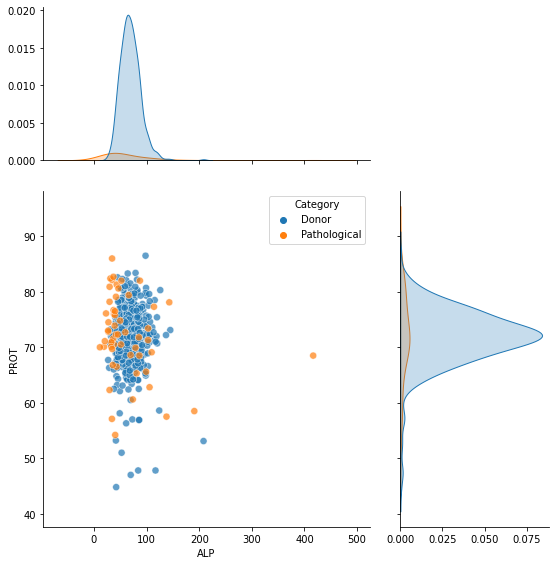

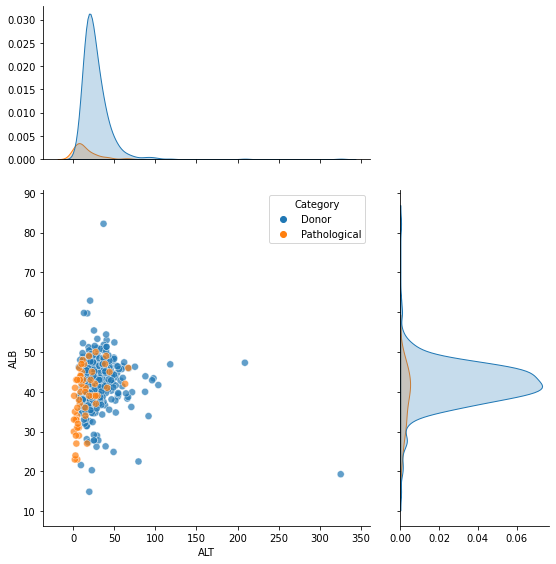

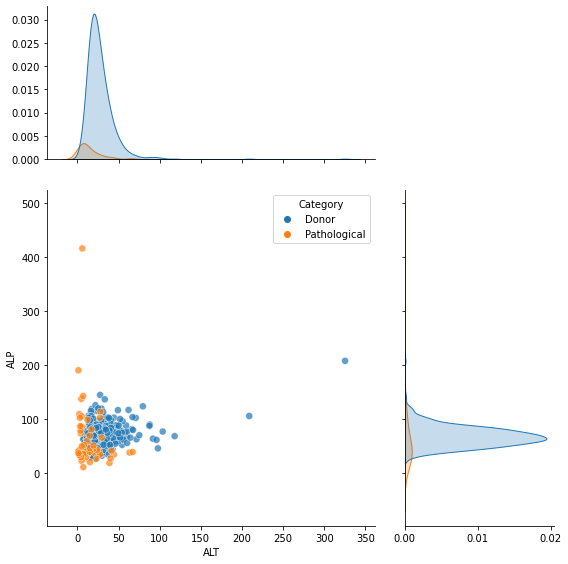

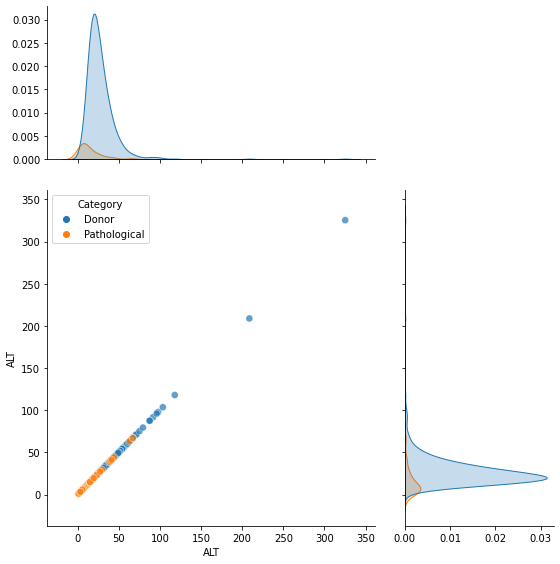

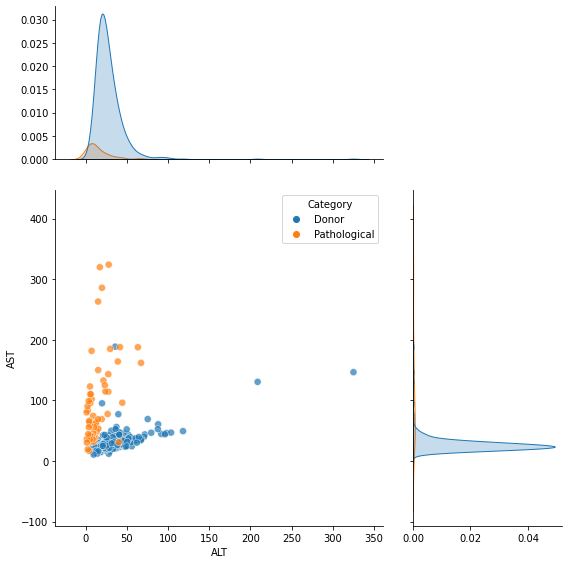

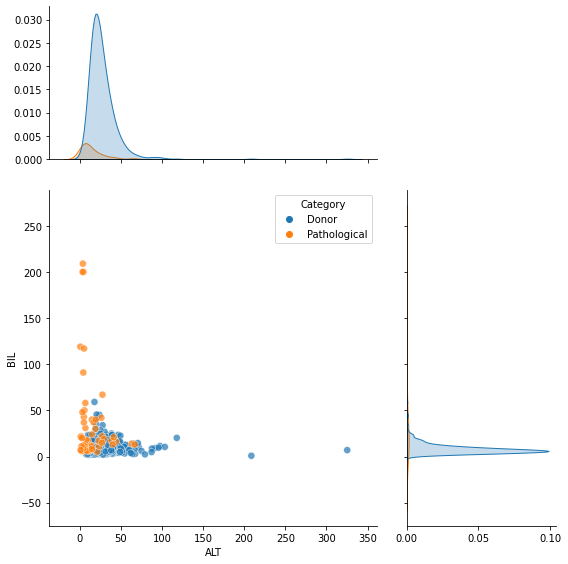

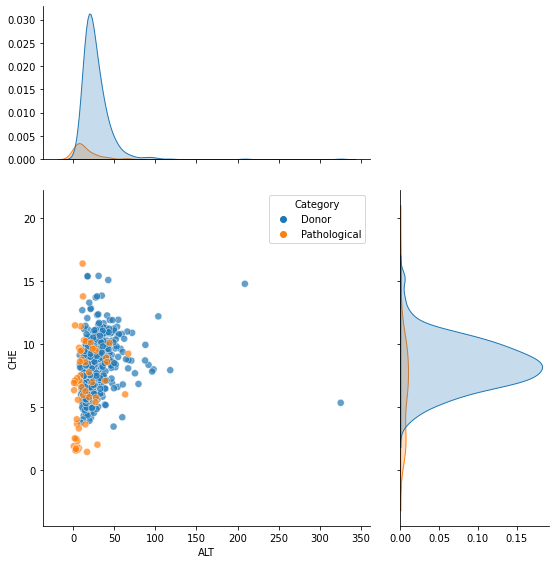

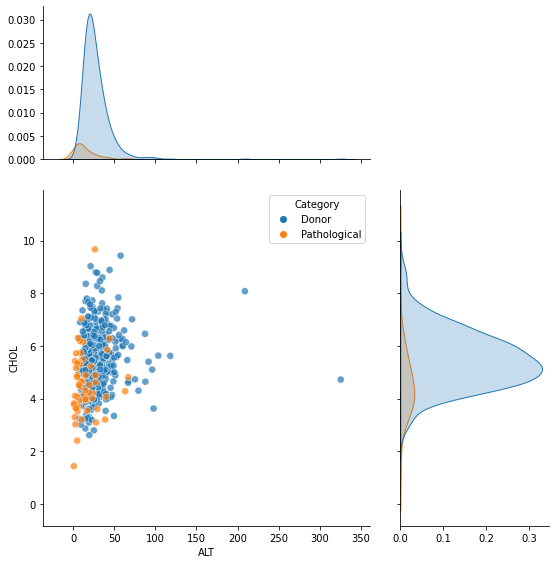

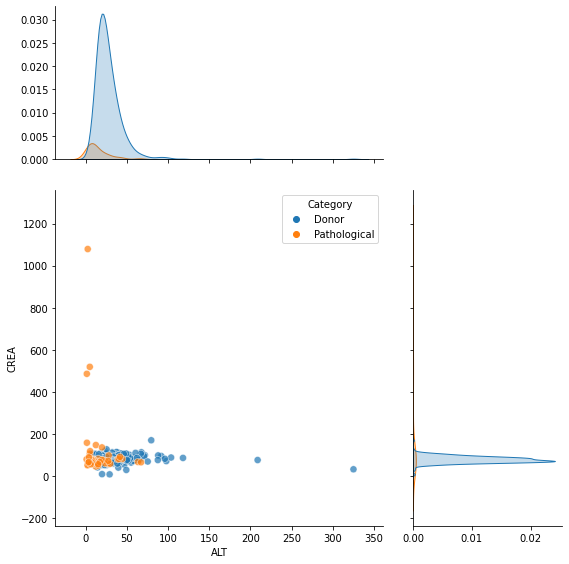

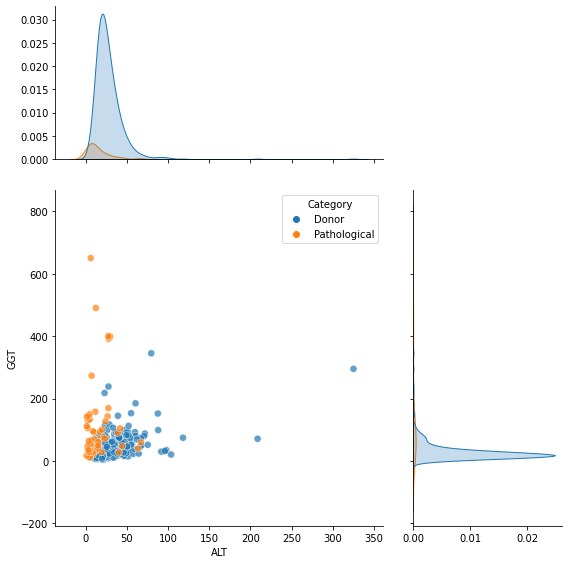

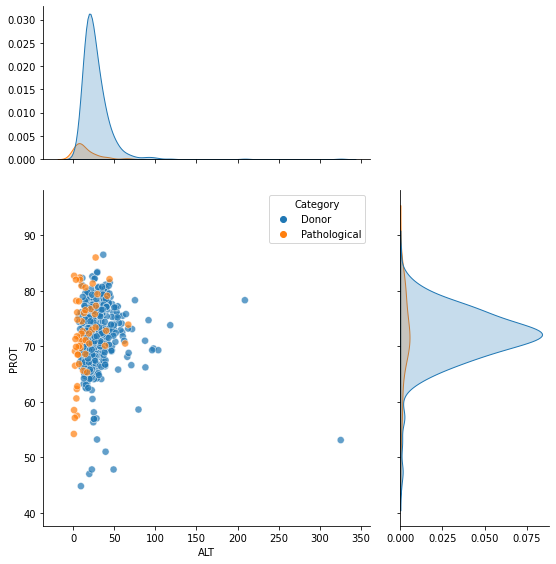

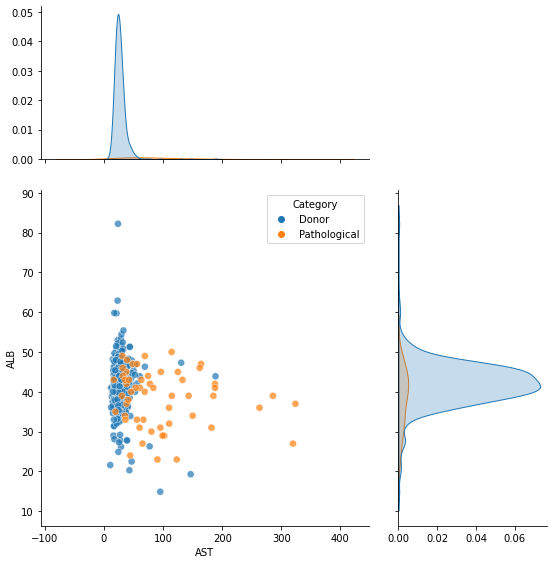

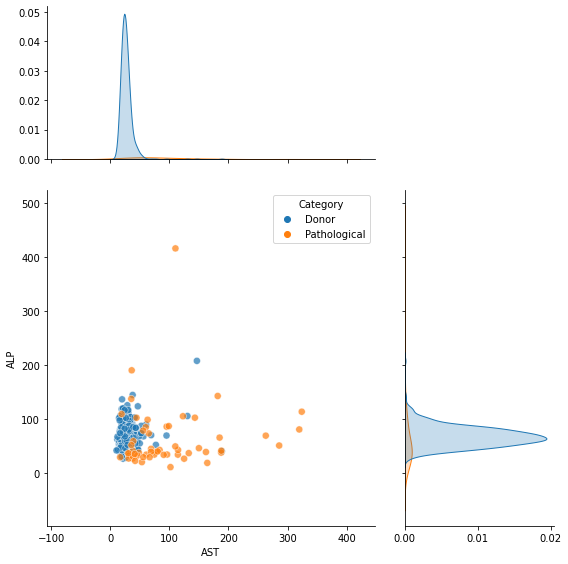

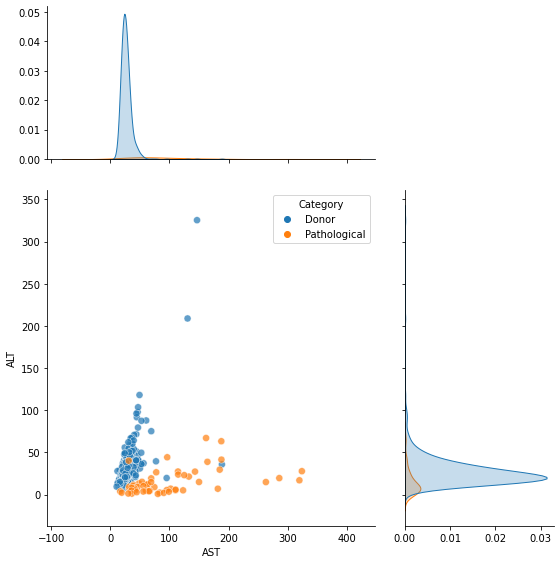

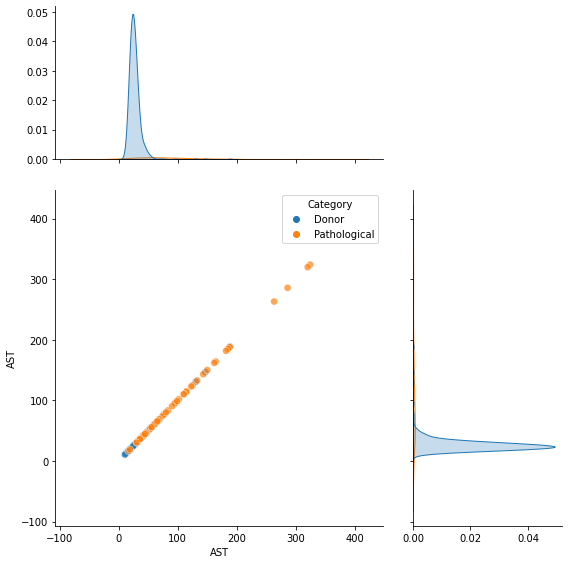

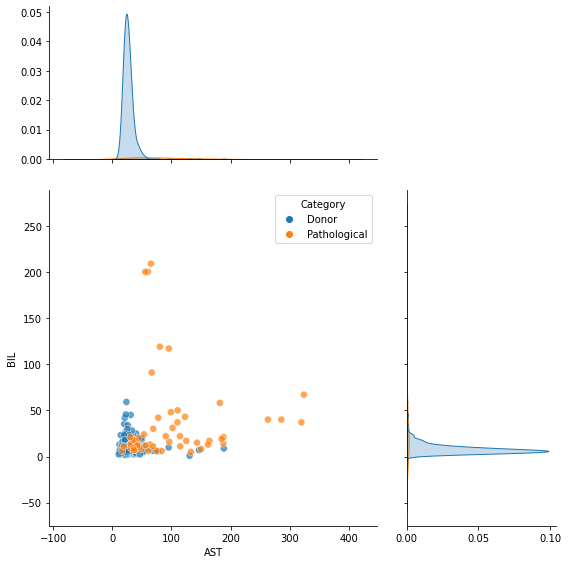

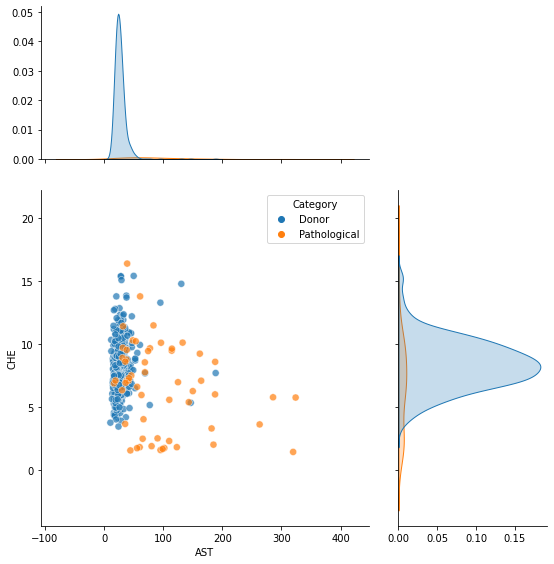

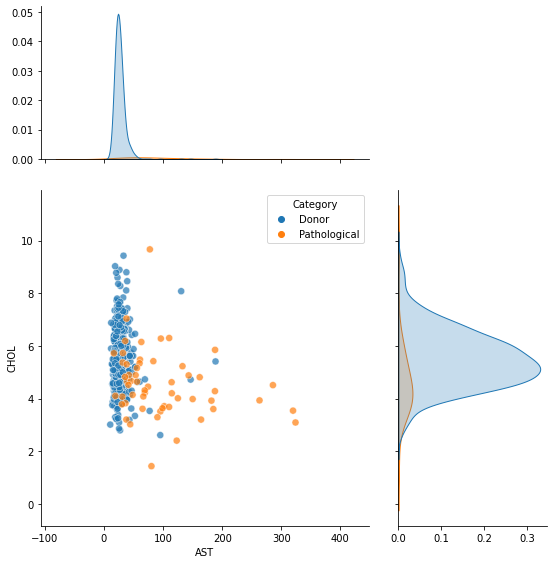

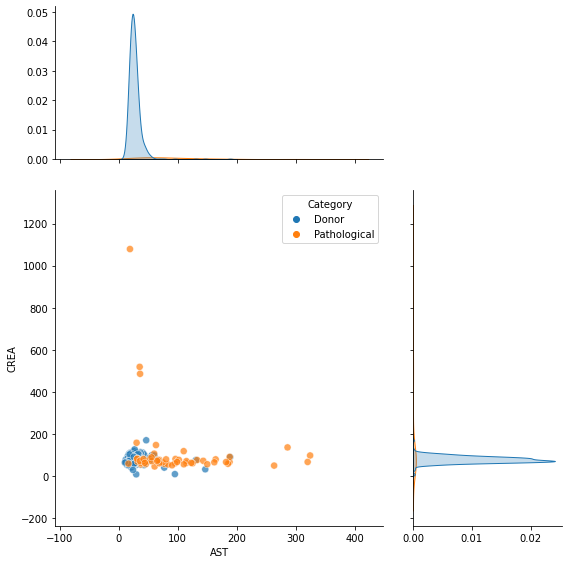

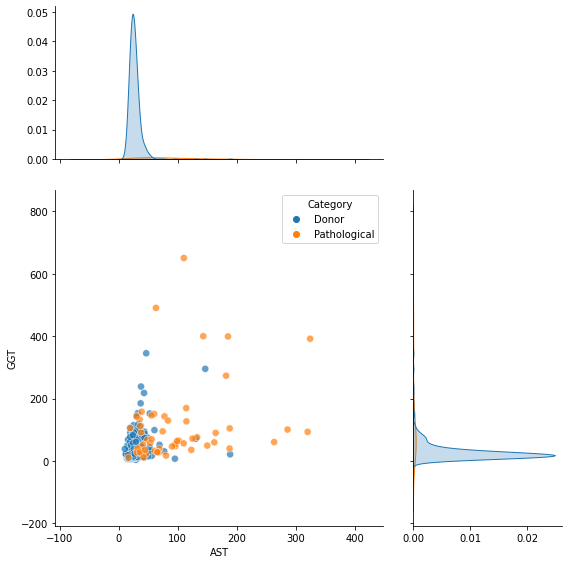

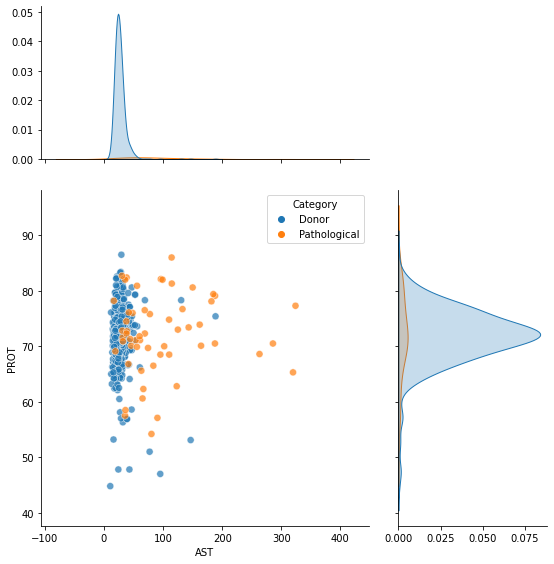

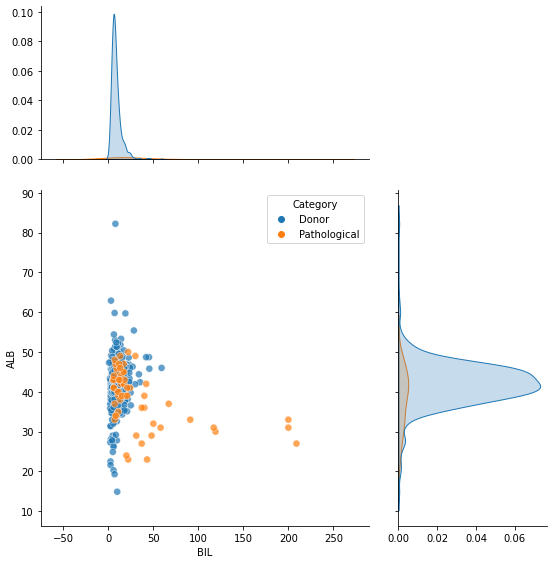

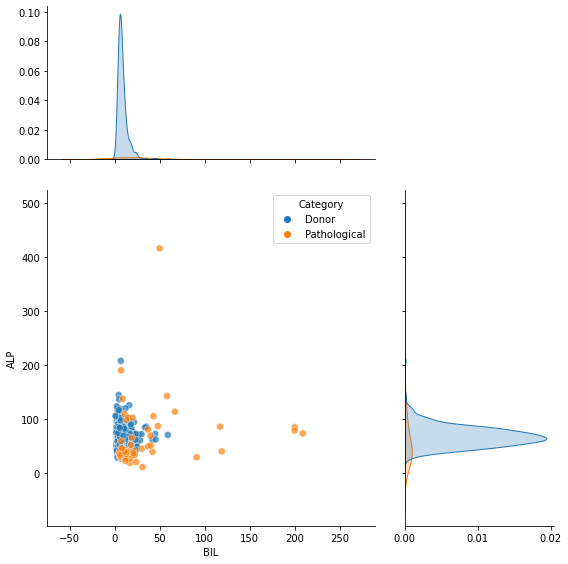

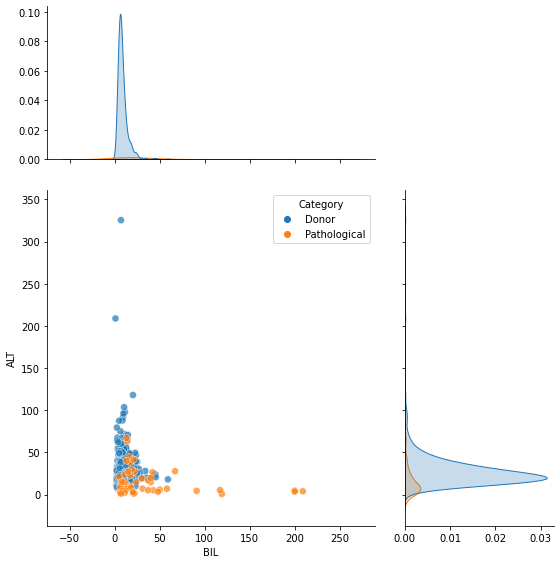

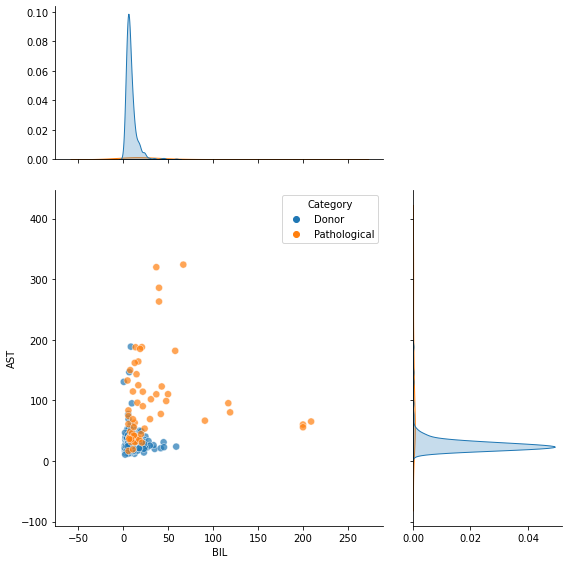

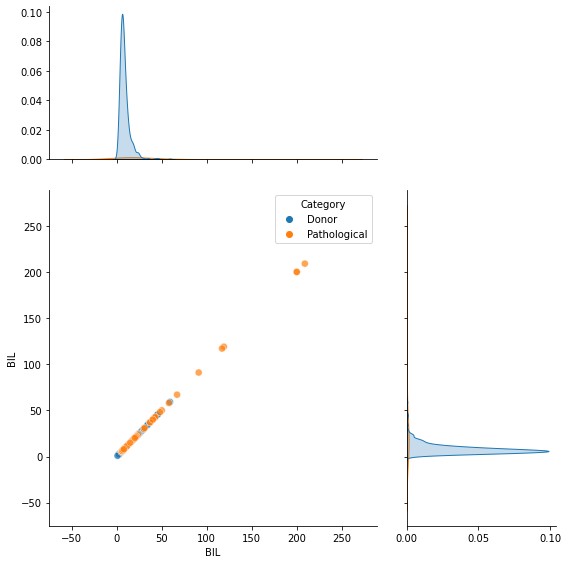

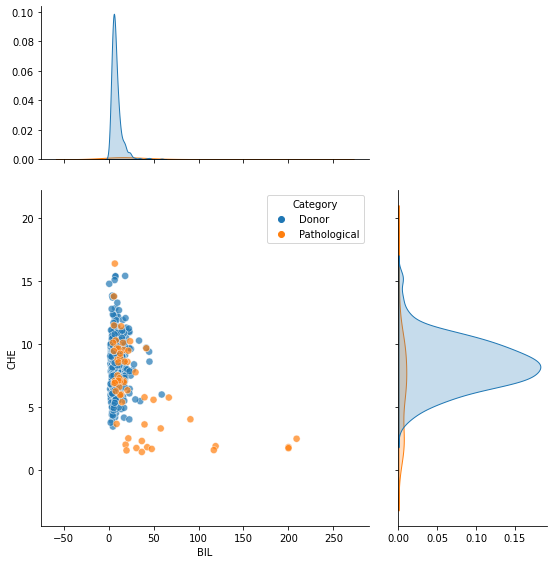

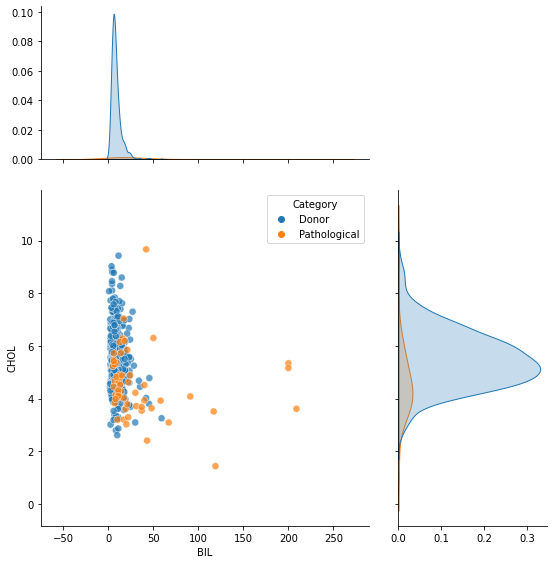

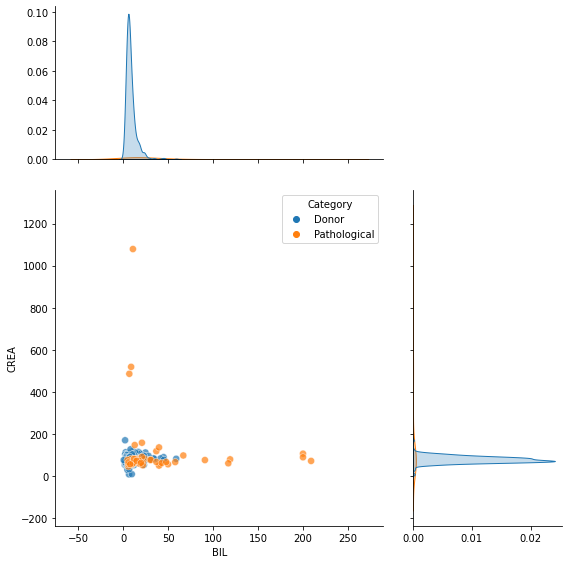

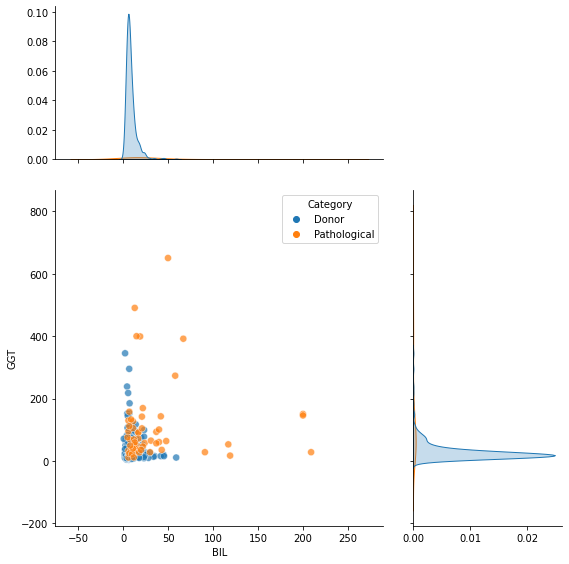

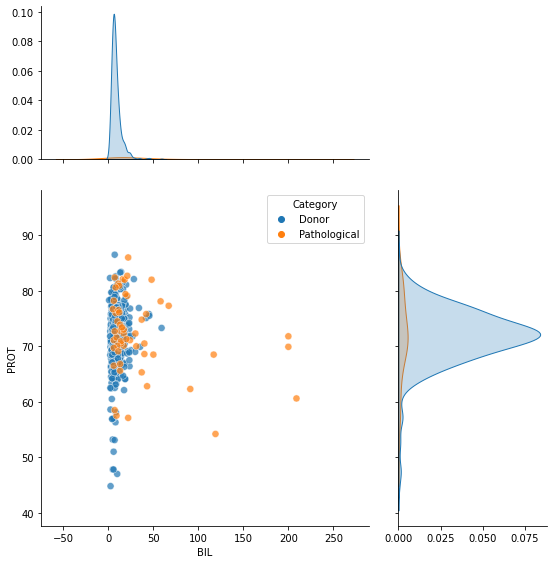

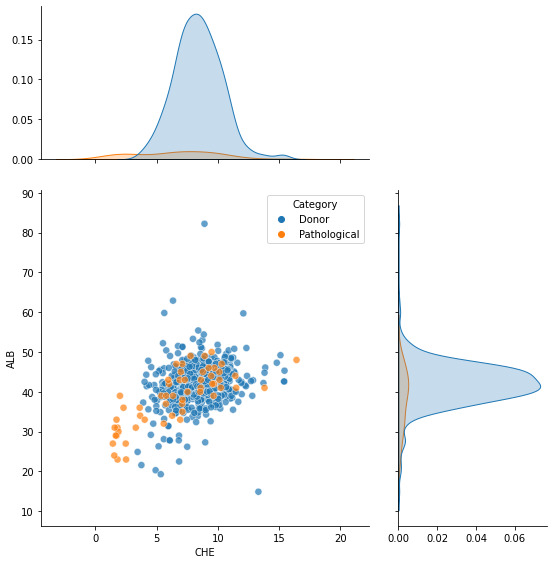

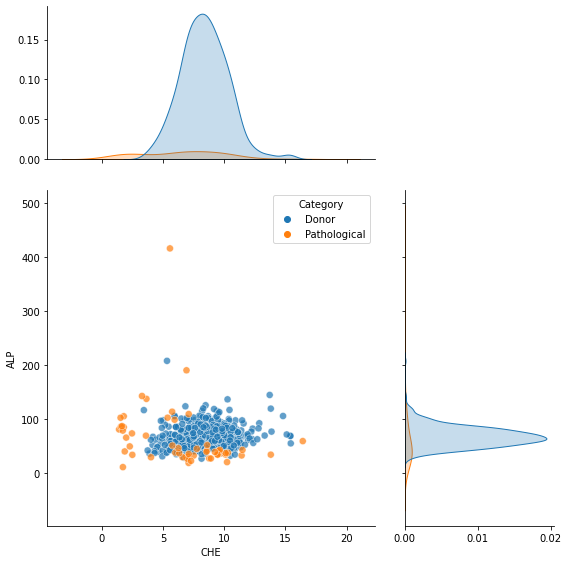

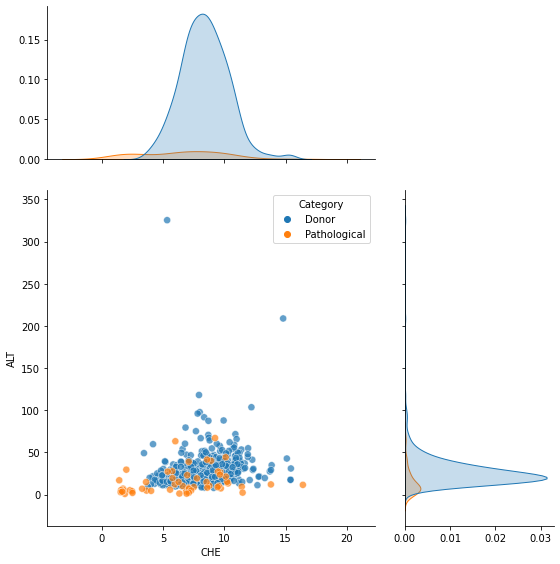

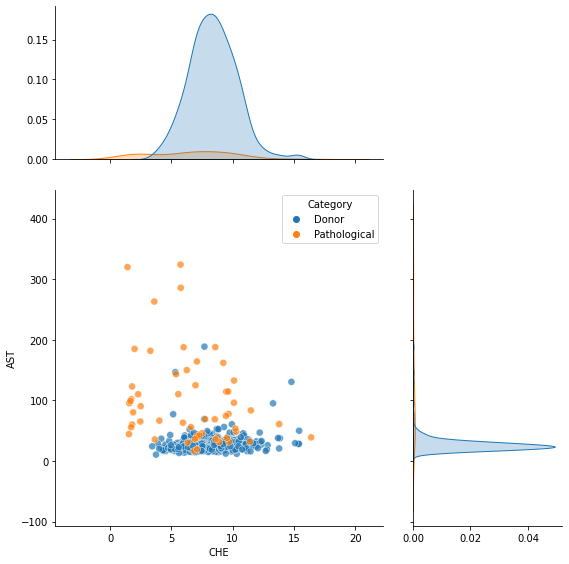

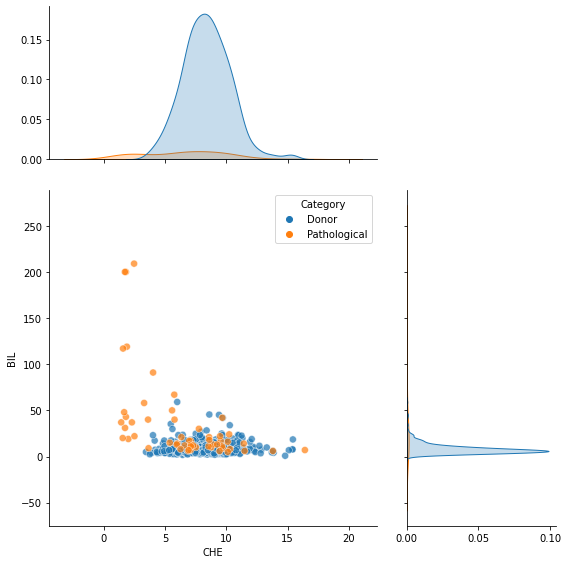

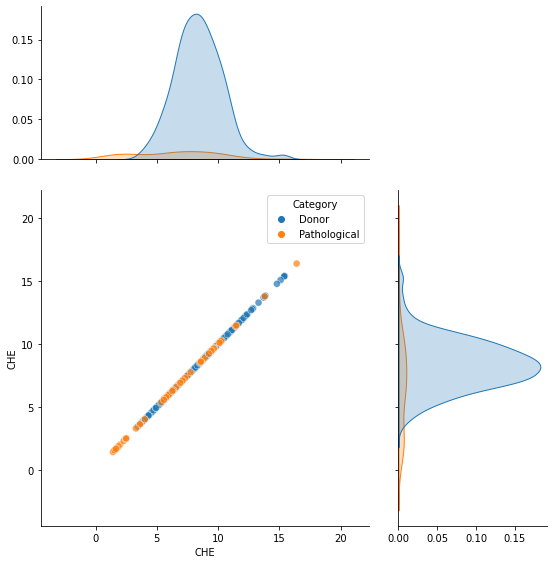

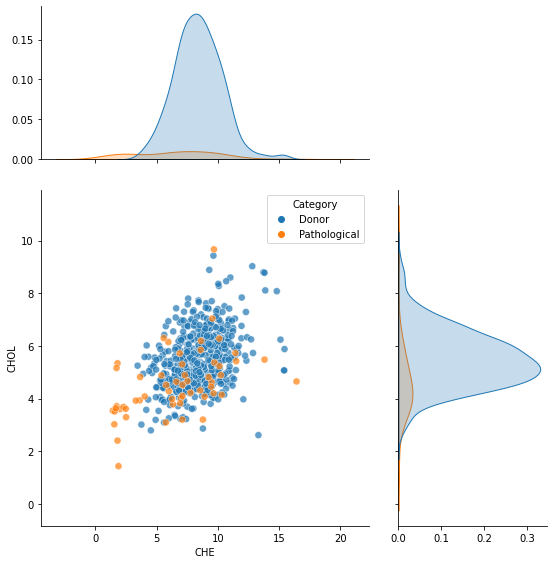

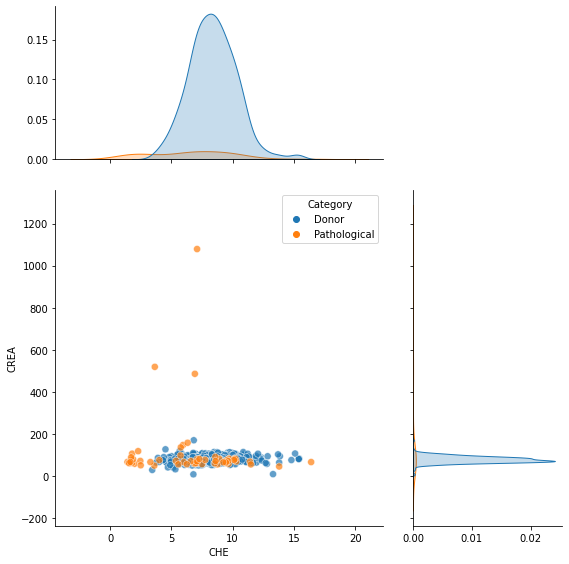

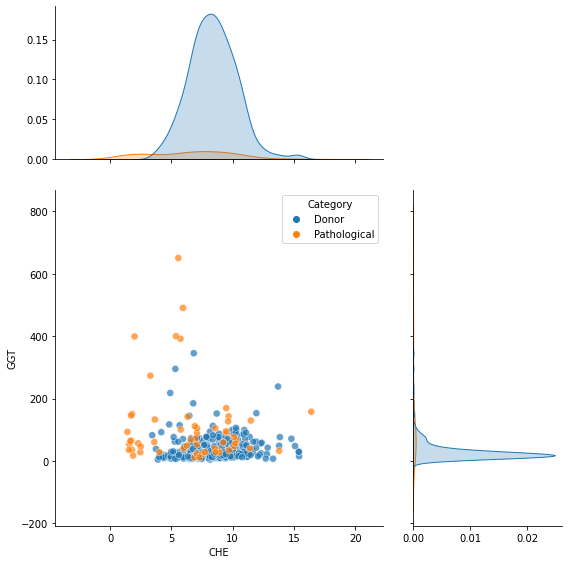

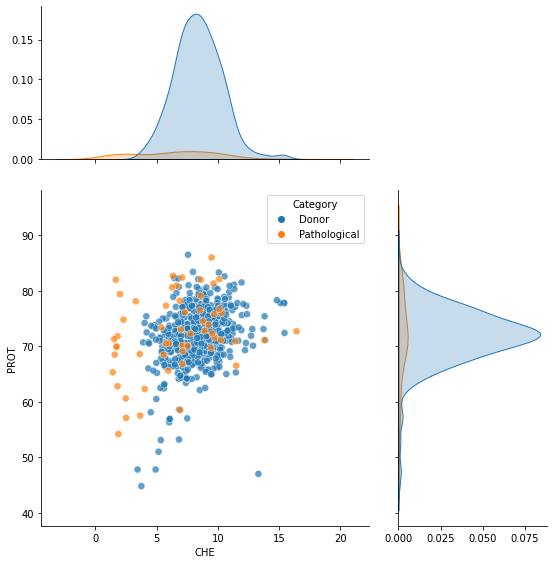

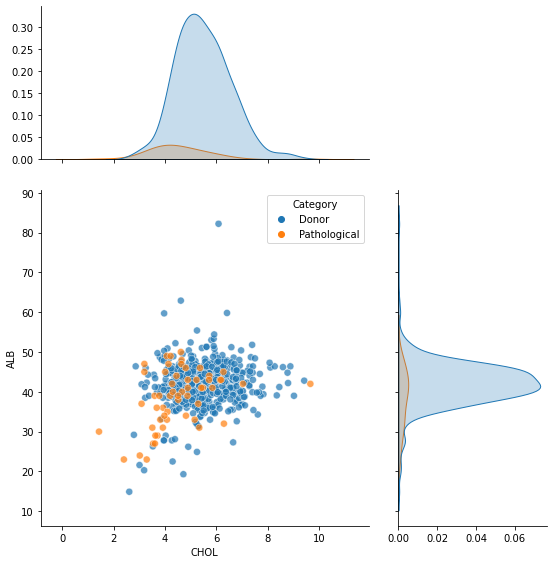

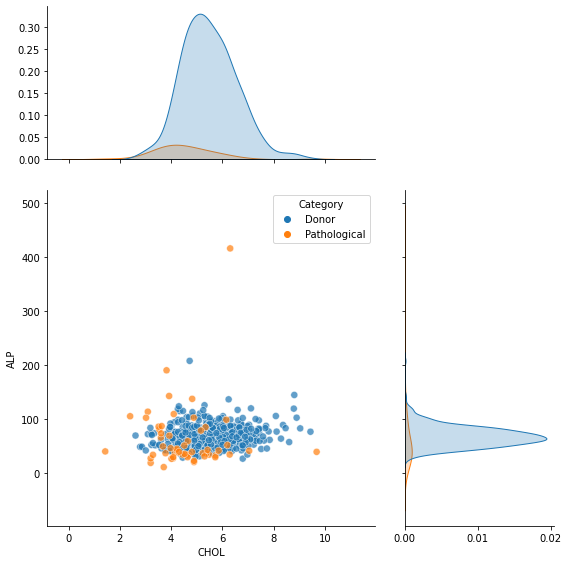

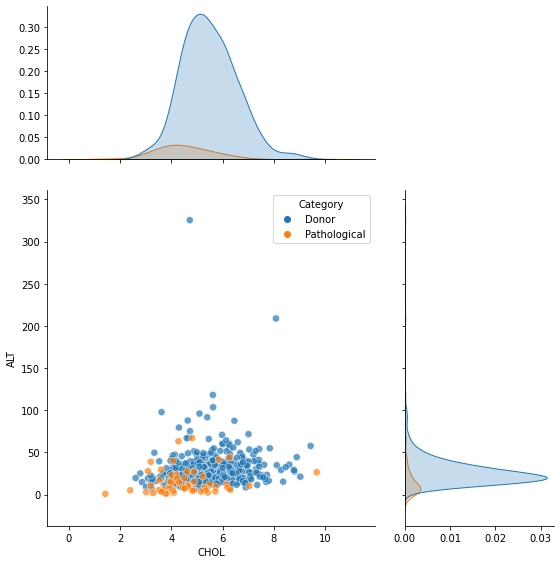

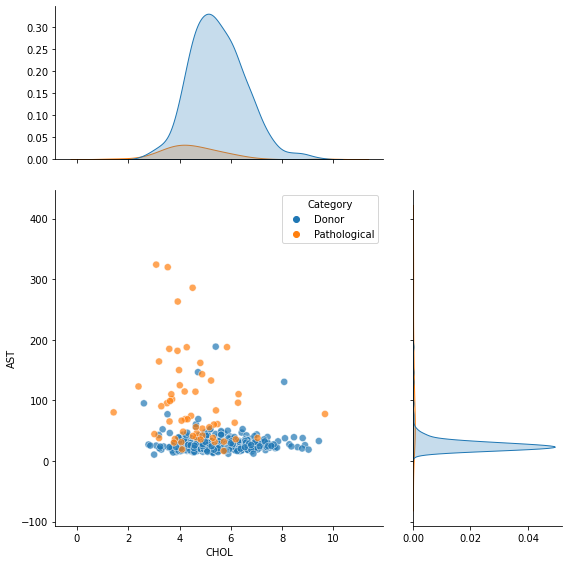

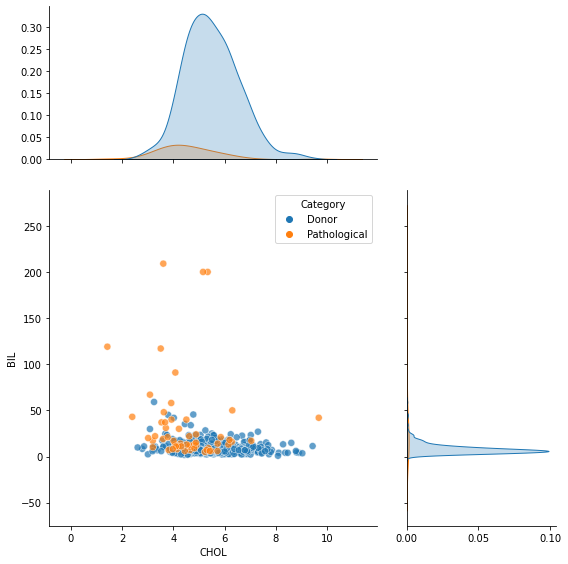

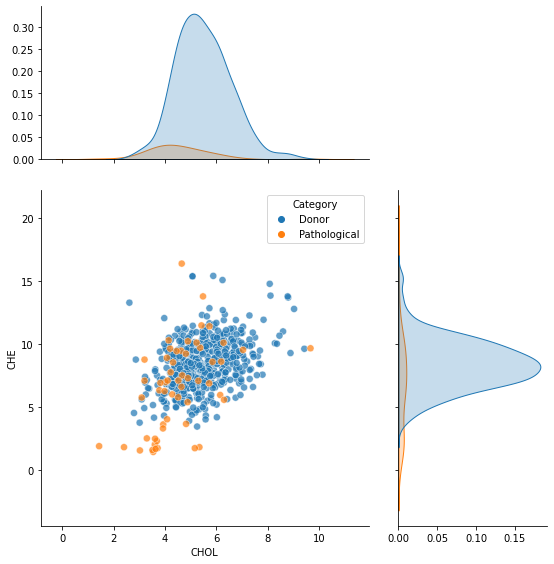

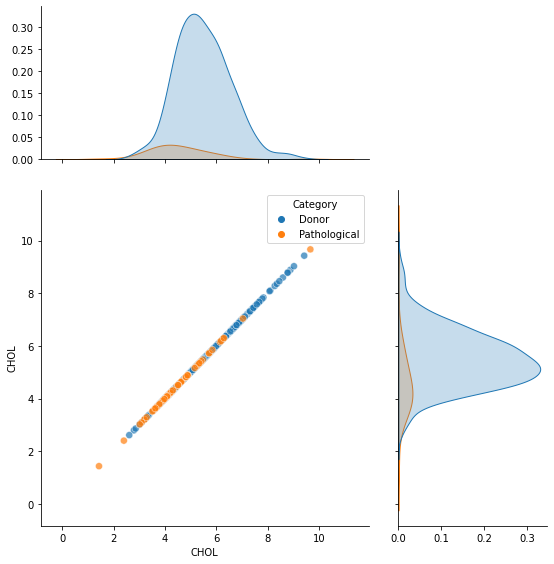

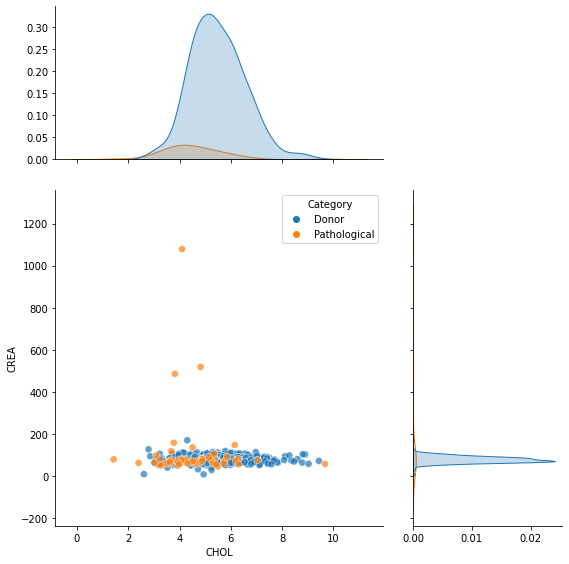

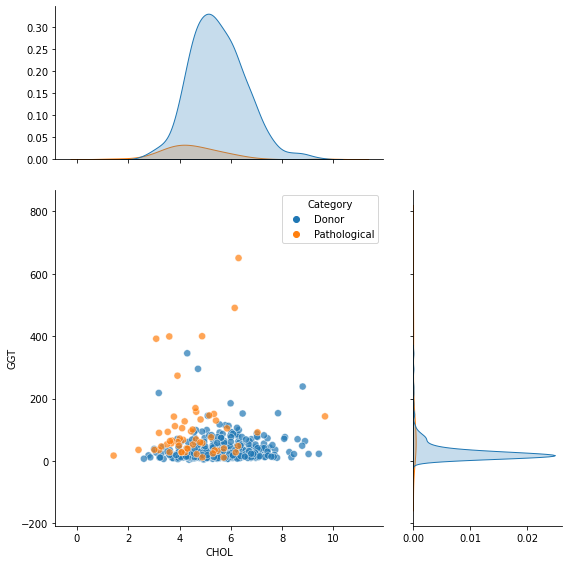

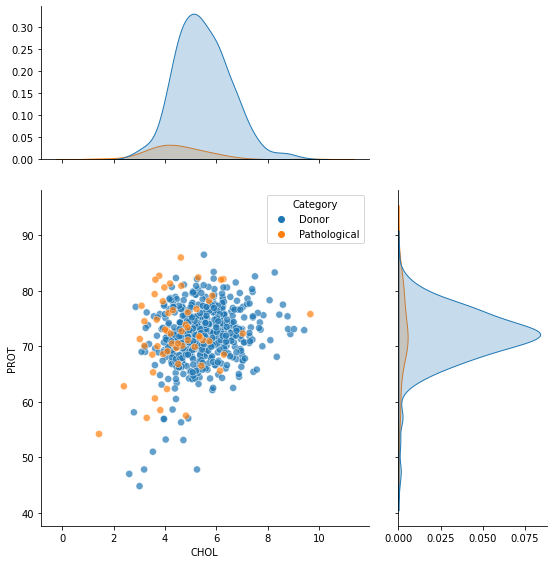

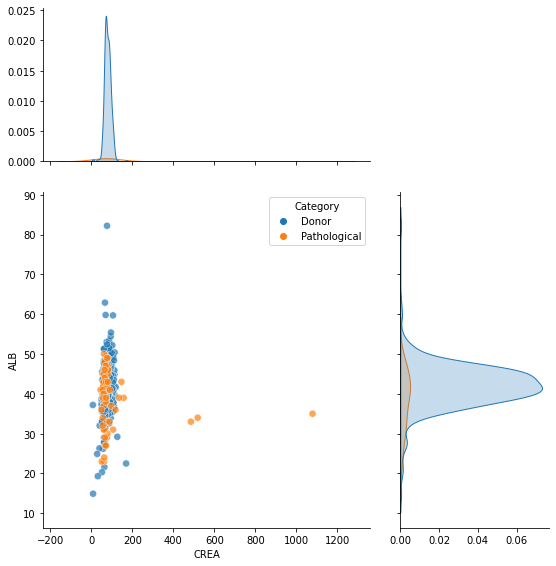

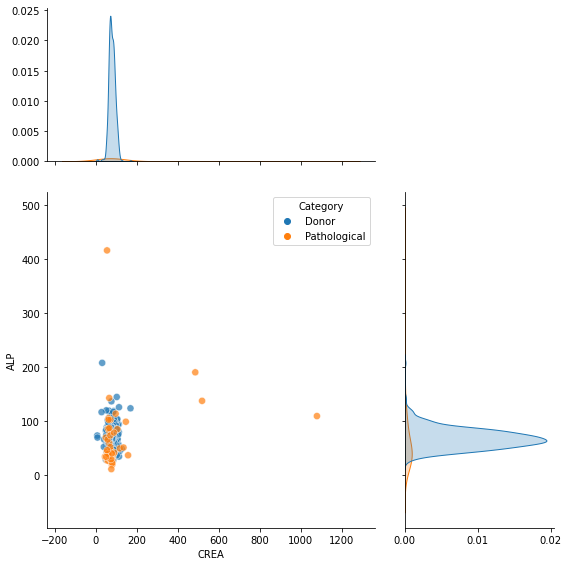

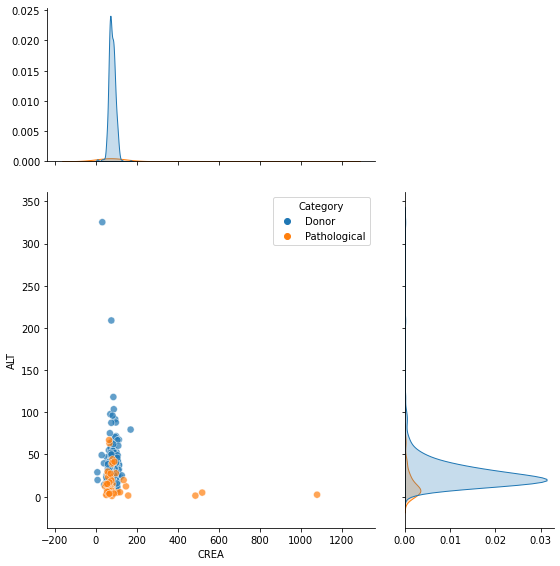

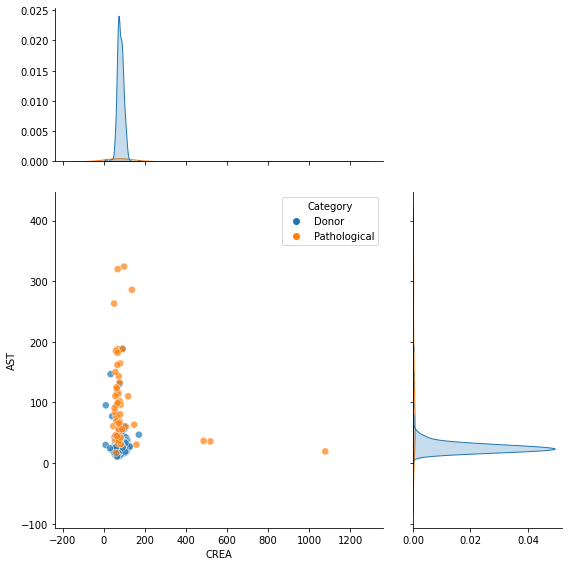

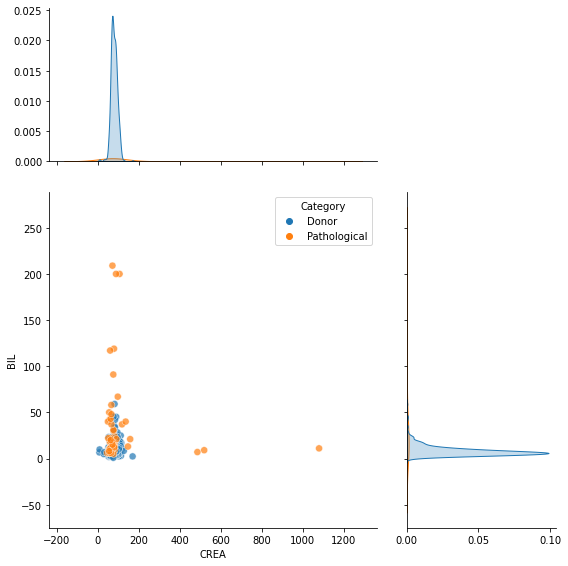

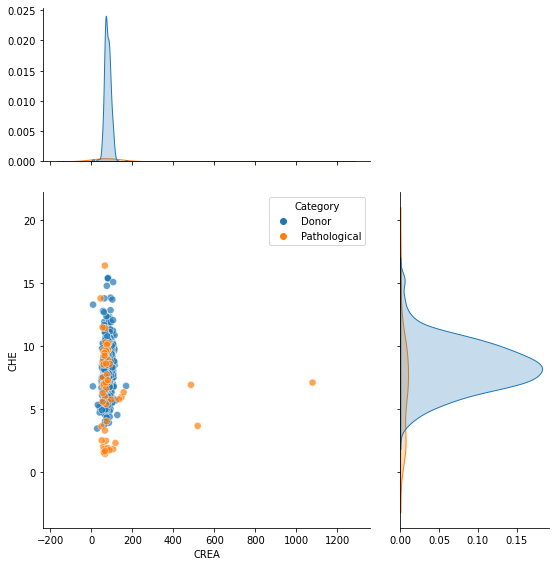

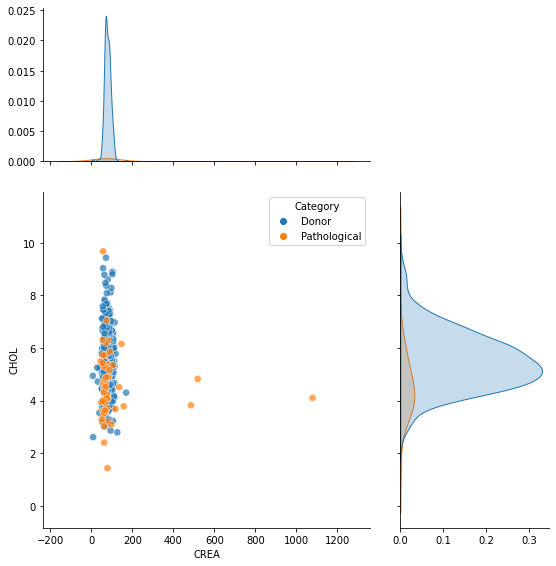

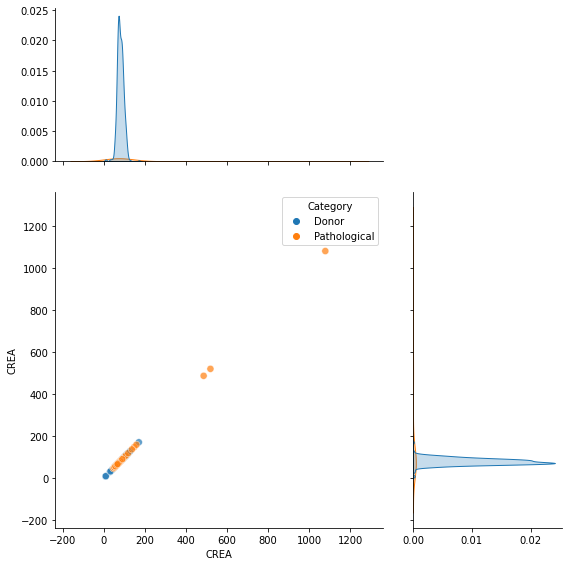

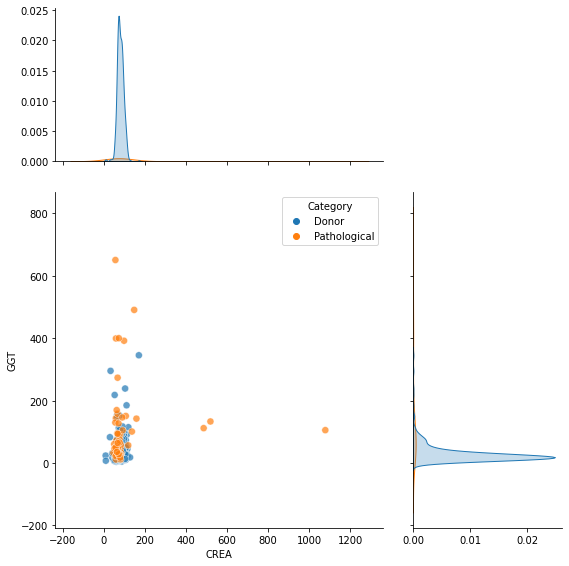

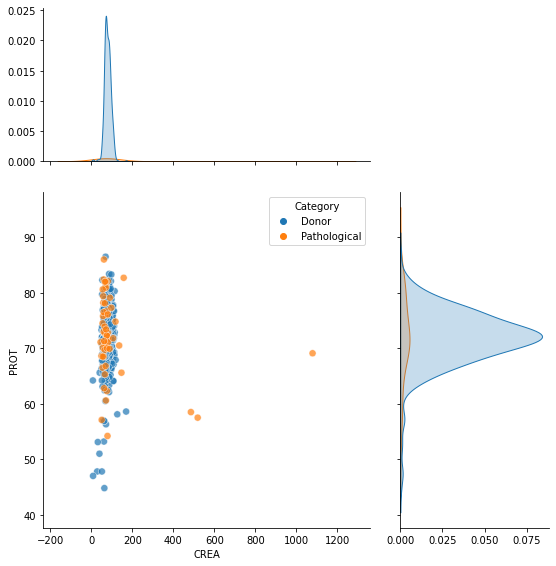

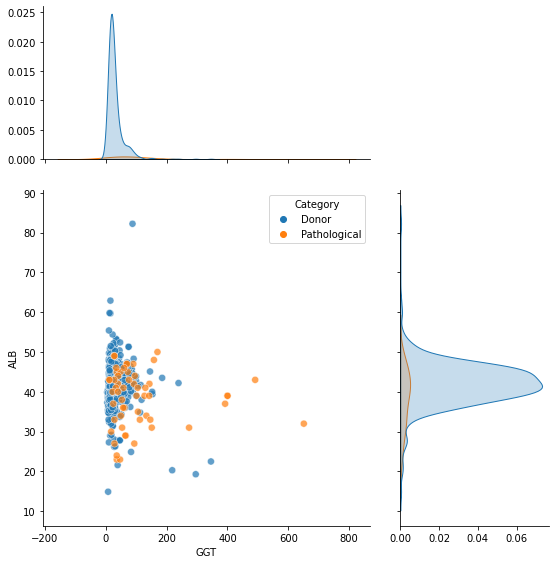

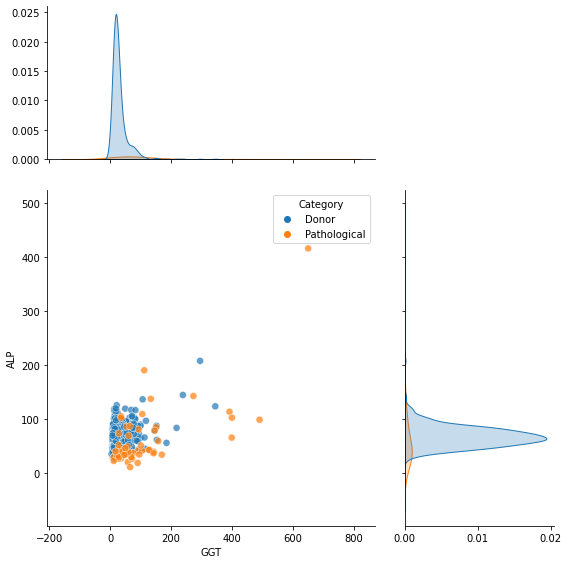

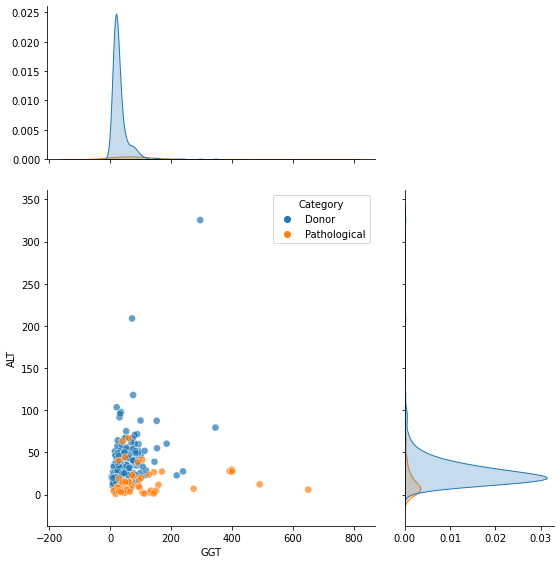

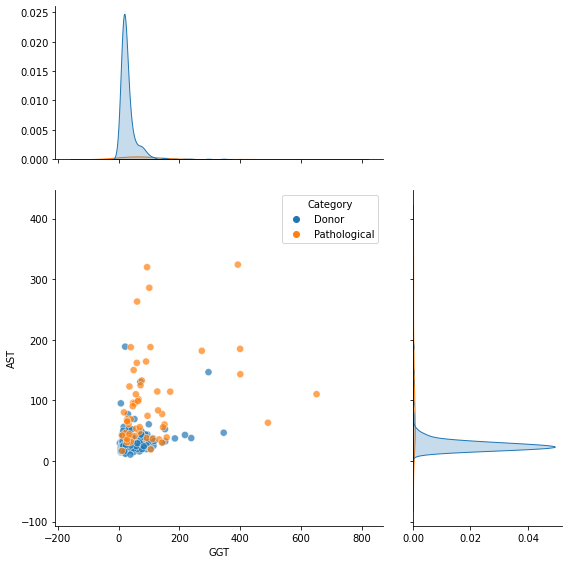

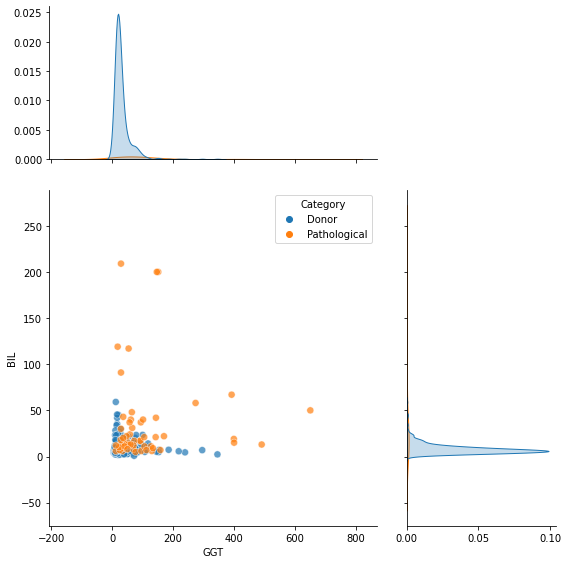

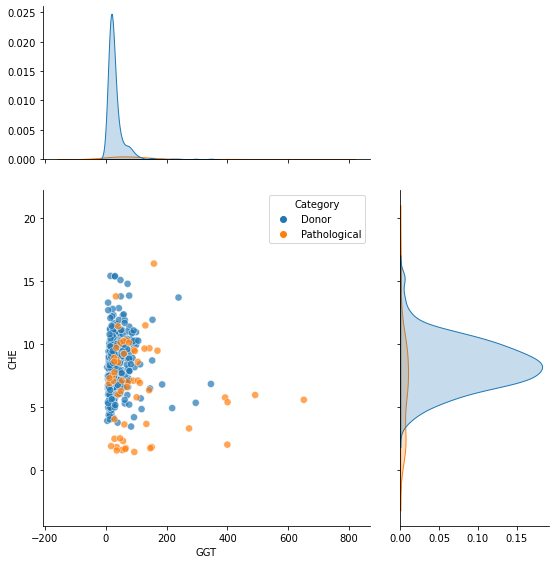

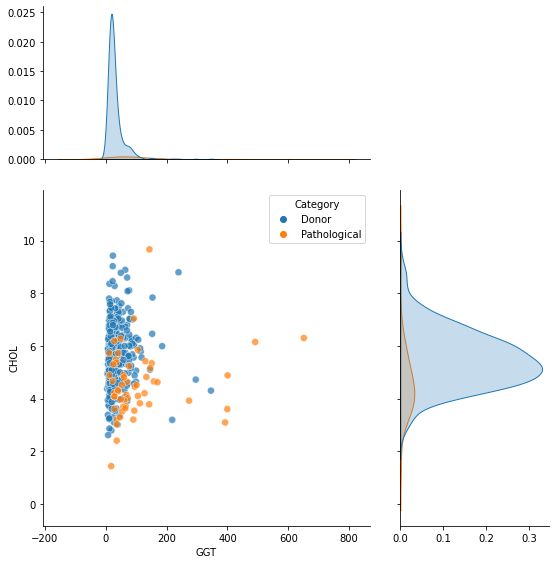

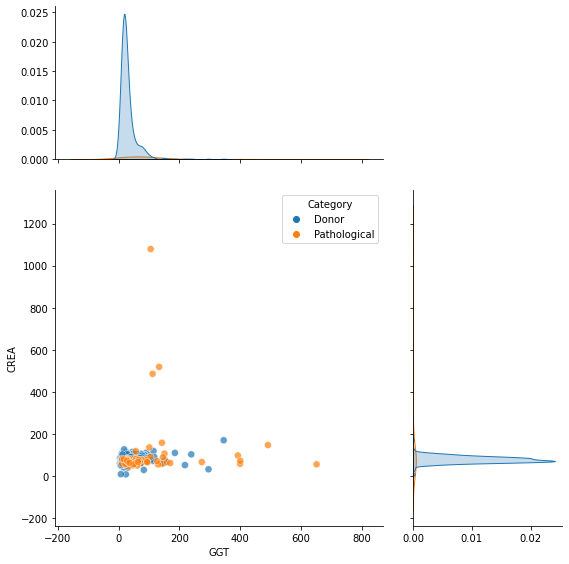

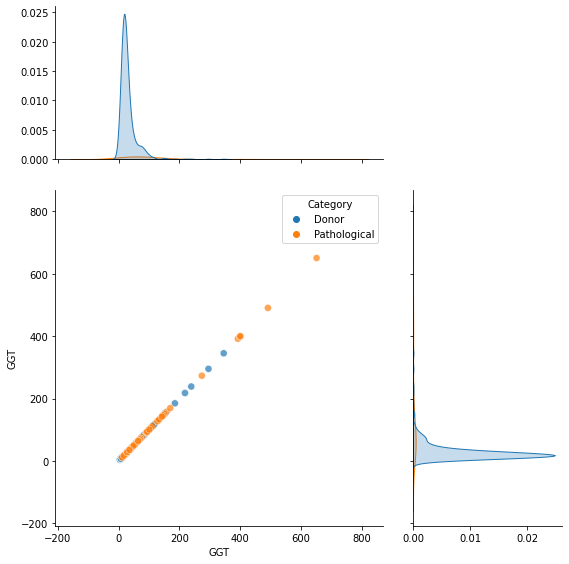

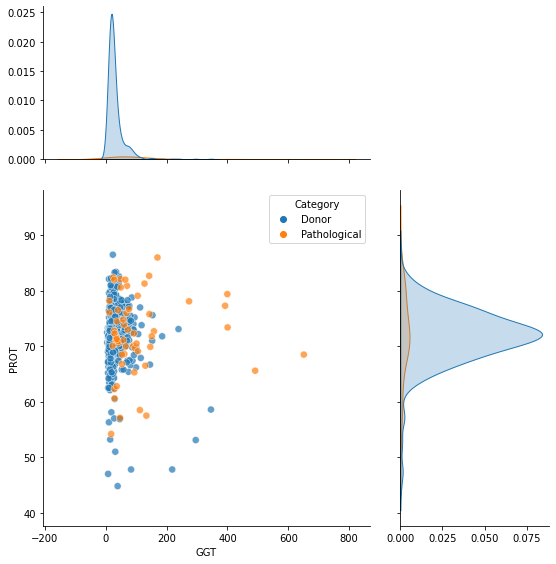

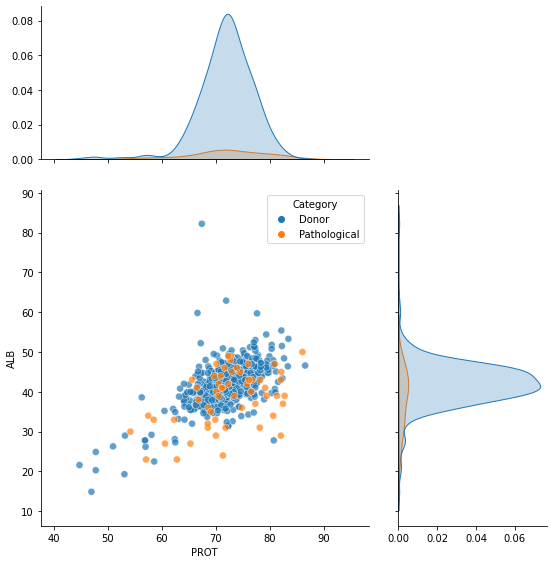

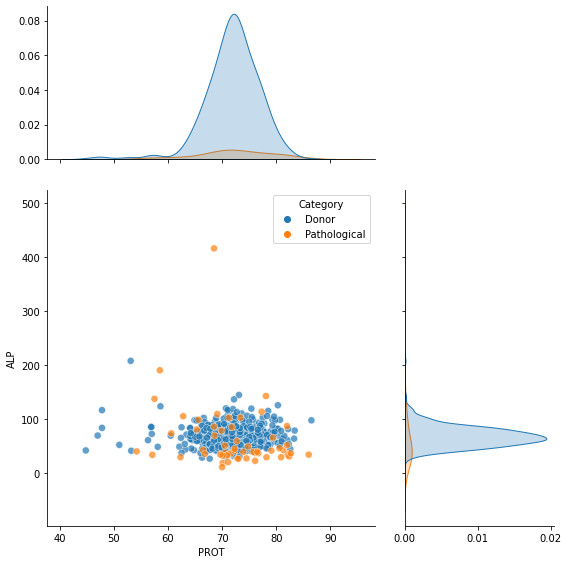

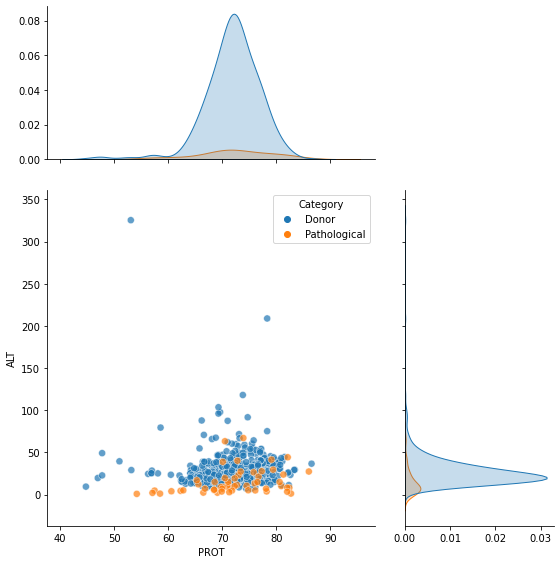

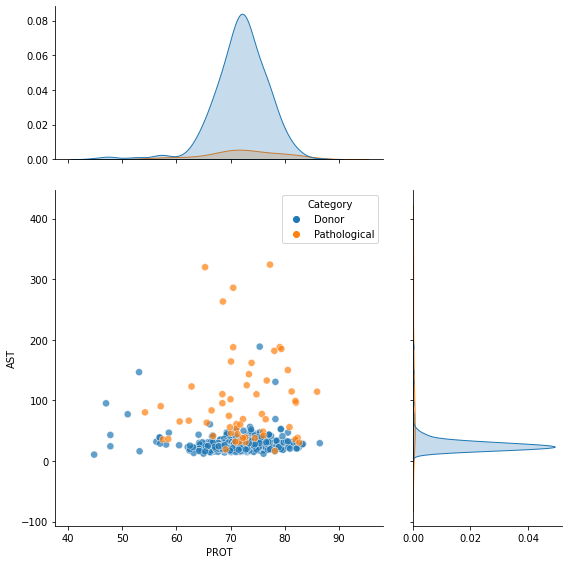

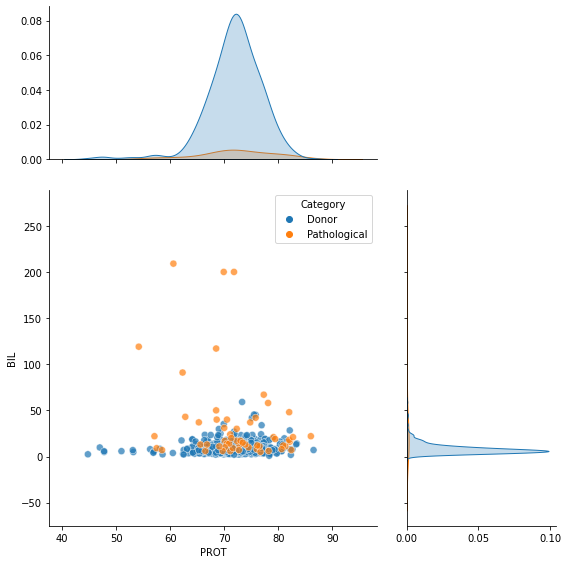

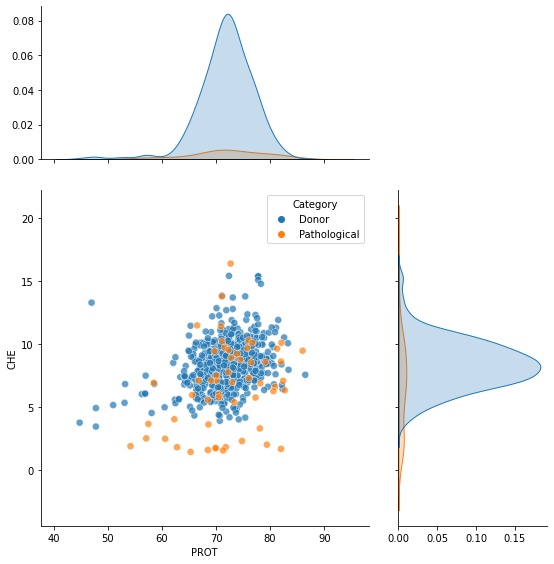

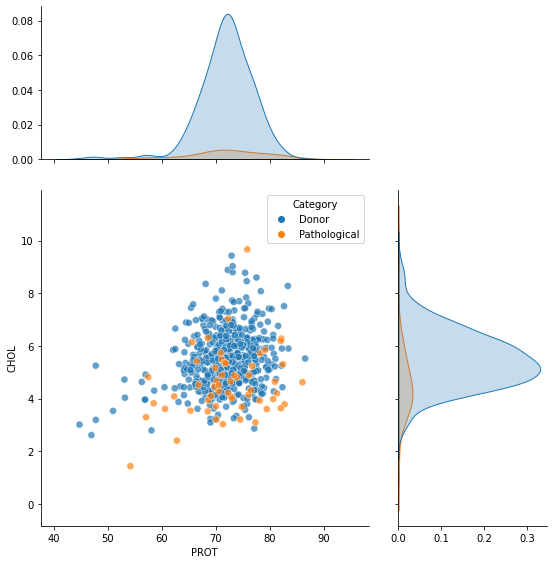

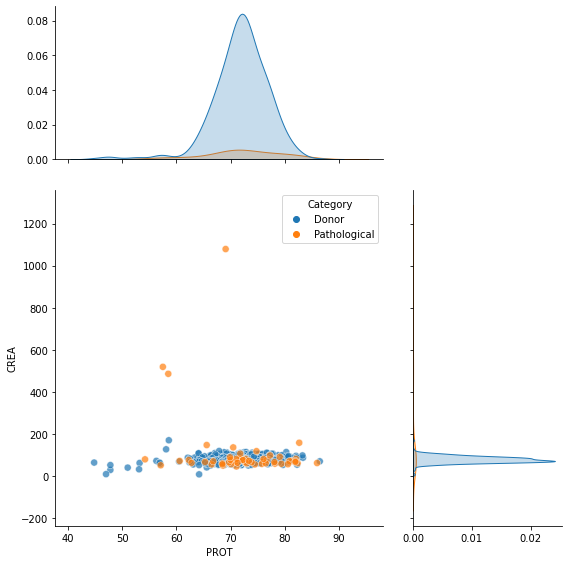

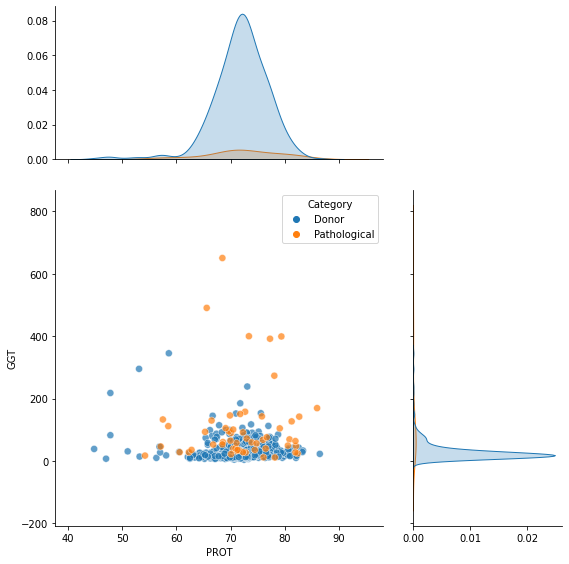

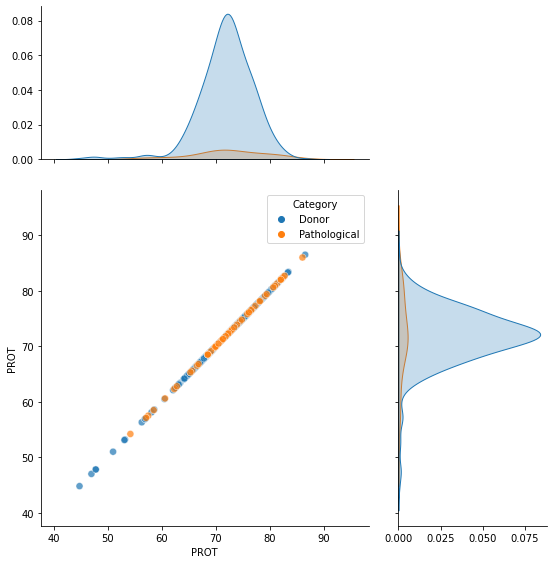

In [9]:
sn.jointplot(data=data, s=50, alpha=0.7, height=8, ratio=2, marginal_ticks=True)
plt.show()
names = data.columns.tolist()
del names[0]
for i in range(len(names)):
  for j in range(len(names)):
    sn.jointplot(x=data[names[i]],y=data[names[j]], data=data,
                 s=50, alpha=0.7, height=8, ratio=2,
                 marginal_ticks=True, hue='Category')
    plt.show()

###Visualizando a correlação entre os pares com o heatmap do Seaborn

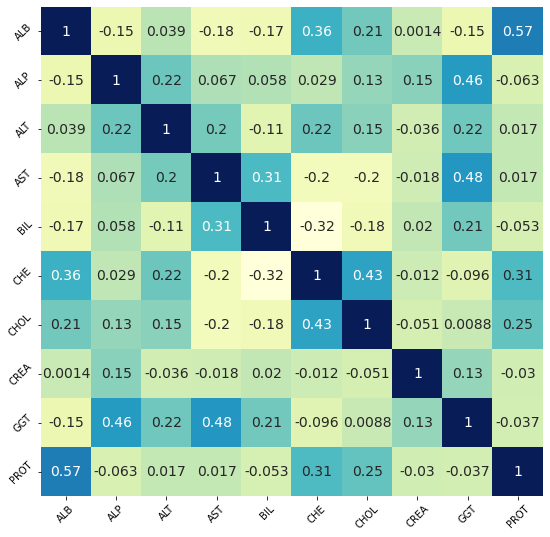

In [10]:
plt.figure(figsize=(9, 9))
p=sn.heatmap(data.corr(), cmap='YlGnBu', annot=True, 
            cbar=False, annot_kws={'size': 14})
p.set_yticklabels(p.get_yticklabels(), rotation = 45)
p.set_xticklabels(p.get_xticklabels(), rotation = 45)
plt.show()

###Visualizando a distribuição das características com o boxplot

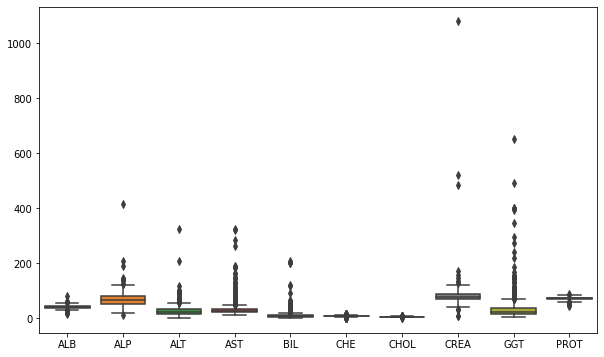

In [11]:
plt.figure(figsize=(10, 6))
sn.boxplot(data=data)
plt.show()